<center>
  <font color=red size=10>2 - Análise Descritiva</font>
</center>


 <font size=5>Nesta fase será apresentada uma análise univariada com estatísticas resumidas, gráficos informativos e insights iniciais sobre todos os atributos do conjunto de dados. Essa etapa permite obter uma compreensão geral da natureza dos dados, identificar tendências preliminares e iniciar o processo de geração de hipóteses para análises posteriores.</font>


# <font color=red>1 - Provisionamento</font>

## 1.1 - Instalar e importar dependências


As instalações das bibliotecas estão comentadas pois estão sendo instaladas em um ambiente virtual onde são executados os notebooks.

In [95]:
# !pip install pandas==2.0.1
# !pip install matplotlib==3.7.1
# !pip install numpy==1.24.3
# !pip install scikit-learn==1.3.1
# !pip install seaborn==0.12.2

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sys

In [97]:
print('Versão do python -> %s' % sys.version)
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do matplotlib -> %s' % plt.matplotlib.__version__)
print('Versão do seaborn -> %s' % sns.__version__)

Versão do python -> 3.10.6 (v3.10.6:9c7b4bd164, Aug  1 2022, 17:13:48) [Clang 13.0.0 (clang-1300.0.29.30)]
Versão do pandas -> 2.0.1
Versão do numpy -> 1.24.3
Versão do matplotlib -> 3.7.1
Versão do seaborn -> 0.12.2


## 1.2 - Carregamento dos arquivos

In [98]:
pagamentos = pd.read_csv('../data/pagamentos.csv')
avaliacoes = pd.read_csv('../data/avaliacoes.csv')
relatorio_vendas = pd.read_csv('../data/relatorio_vendas.csv')

## 1.3 - Transformar as colunas com datas para o formato datetime

In [99]:
colunas_data = ['data_limite_envio', 'data_compra', 'data_aprovacao_pedido', 'data_entrega_transportadora', 'data_entrega_cliente', 'data_estimada_entrega']
for coluna in colunas_data:
    relatorio_vendas[coluna] = pd.to_datetime(relatorio_vendas[coluna], format='ISO8601')

In [100]:
avaliacoes['avaliacao_data'] = pd.to_datetime(avaliacoes['avaliacao_data'], format='ISO8601')
avaliacoes['avaliacao_data_resposta'] = pd.to_datetime(avaliacoes['avaliacao_data_resposta'], format='ISO8601')

# <font color=red>2 - Conhecendo os Dados</font>

## 2.1 - Dataset do projeto

<font color=red size=6> Brazilian E-Commerce Public Dataset by Olist</font>

O <b>Conjunto de Dados Públicos de E-Commerce Brasileiro da Olist</b> é um conjunto de dados públicos de e-commerce brasileiro com pedidos feitos na loja Olist. O conjunto de dados contém informações de 100 mil pedidos feitos de 2017 a 2018 em diversos marketplaces no Brasil. Suas características permitem visualizar um pedido de várias perspectivas: pelo preço, pagamento e desempenho de frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes.

Estes são dados comerciais reais, foram anonimizados, e as referências às empresas e parceiros no texto das avaliações foram substituídas pelos nomes de Game of Thrones great houses.

<font size=4>Fonte dos Dados</font>

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

## 2.2 - Tipos das Variáveis

**Qualitativos Nominais:**

- **pagamento_forma:** Forma de pagamento utilizada pelo cliente.
- **produto_categoria:** Categoria do produto.
- **produto:** Nome do produto.
- **cliente:** Cidade e o Estado do cliente concatenado com o seu id_unico.
- **cliente_cep:** CEP (Código de Endereçamento Postal) do cliente.
- **cliente_cidade:** Cidade do cliente.
- **cliente_estado:** Estado do cliente.
- **cliente_regiao:** Região do cliente.
- **vendedor:** Cidade e o Estado do vendedor concatenado com o seu id.
- **vendedor_cep:** CEP do vendedor.
- **vendedor_cidade:** Cidade do vendedor.
- **vendedor_estado:** Estado do vendedor.
- **vendedor_regiao:** Região do vendedor.
- **avaliacao_titulo:** Título do comentário da avaliação.
- **avaliacao_comentario:** Comentário da avaliação.

**Qualitativos Ordinais:**

- **avaliacao_nota:** Pontuação atribuída à avaliação (pode ser de 1 a 5, por exemplo).

**Quantitativos Discretos:**

- **pagamento_parcelas:** Número de parcelas do pagamento.

**Quantitativos Contínuos:**

- **preco:** Preço do produto.
- **frete:** Valor do frete.
- **pagamento_valor:** Valor do pagamento.

**Variáveis Temporais:**

- **data_limite_envio:** Data limite para o envio do pedido.
- **data_compra:** Data da compra.
- **data_aprovacao_pedido:** Data de aprovação do pedido.
- **data_entrega_transportadora:** Data de entrega à transportadora.
- **data_entrega_cliente:** Data de entrega ao cliente.
- **data_estimada_entrega:** Data estimada de entrega.
- **avaliacao_data:** Data da avaliação.
- **avaliacao_data_resposta:** Data de resposta à avaliação.

**Varáveis de Identificação e Referência:**

- **pedido_id:** Identificador único para cada pedido.
- **pedido_item_id:** Identificador único para cada item do pedido.
- **avaliacao_id:** Identificador único para cada avaliação.
- **produto_id:** Identificador único para cada produto.
- **vendedor_id:** Identificador único para cada vendedor.
- **cliente_id:** Identificador único para cada cliente.
- **cliente_id_unico:** Identificador único do cliente.
- **produto_categoria_ref:** Referência da categoria do produto.
- **cliente_cidade_ref:** Referência da cidade do cliente.
- **cliente_estado_ref:** Referência do estado do cliente.
- **cliente_regiao_ref:** Referência da região do cliente.
- **vendedor_cidade_ref:** Referência da cidade do vendedor.
- **vendedor_estado_ref:** Referência do estado do vendedor.
- **vendedor_regiao_ref:** Referência da região do vendedor.
- **cliente_lat:** Latitude do cliente.
- **cliente_lon:** Longitude do cliente.
- **vendedor_lat:** Latitude do vendedor.
- **vendedor_lon:** Longitude do vendedor.

## 2.3 - Atributos Criados

- **cliente**
- **cliente_lat**
- **cliente_lon**
- **cliente_regiao**
- **cliente_regiao_ref**
- **cliente_cidade_ref**
- **cliente_estado_ref**
- **vendedor**
- **vendedor_lat**
- **vendedor_lon**
- **vendedor_regiao**
- **vendedor_regiao_ref**
- **vendedor_cidade_ref**
- **vendedor_estado_ref**
- **produto**
- **produto_categoria_ref**

## 2.4 - Atributos Removidos

- **comprimento_nome_produto**
- **comprimento_descricao_produto**
- **quantidade_fotos_produto**
- **peso_produto_gramas**
- **comprimento_produto_cm**
- **altura_produto_cm**
- **largura_produto_cm**
- **pagamentos_sequencia**
- **pedido_status**

## 2.5 - Tratamentos Realizados nos Dados Originais no Notebook "1-Pré-Processamento"

- Para tratar os dados nulos das colunas **"cliente_lat"**, **"cliente_lon"**, **"vendedor_lat"**, **"vendedor_lon"**, foi colocado os dados da mesma cidade ignorando a exatidão de localização do CEP. 1-(2.4 e 2.5)
- Para tratar os dados nulos das colunas **"cliente_lat"**, **"cliente_lon"**, **"vendedor_lat"**, **"vendedor_lon"** que não tinham referência específica para suas cidades, foram usadas coordenadas aleatórias correspondentes aos seus respectivos estados. 1-(2.4 e 2.5)
- Os valores nulos da coluna  **"produto_categoria"** foi preenchida com o valor **"indefinido"**. 1-(4.3)
- A coluna **"produto"** foi criada com o valor da categoria do produto e a soma de todas as outras colunas de pesos e medidas, levando em consideração, se todas as características dos comprimentos de nome e descrição e todas as medidas e pesos forem iguais, quer dizer que se refere ao mesmo produto. 1-(4.4)
- Foi padronizada a coluna **"produto_categoria"** para uma melhor análise mantendo a qualificação original no nome do produto.1-(4.6)
- Foram removida as linhas irrelevantes para as análises da coluna **"pedido_status"**, pois serão usados somente pedidos entregues e concluídos, após apagadas essas linhas, restou somente o valor **"entregue"**, consequentemente a coluna foi removida em seguida.1-(6.3 e 6.4)
- Para preencher os dados nulos da coluna **"data_aprovacao_pedido"** foi calculado o tempo médio em que o pedido é aprovado e esse valor foi adicionado à data da compra.1-(6.5.1)
- Essa mesma lógica acima foi usada para preencher a coluna **"data_entrega_transportadora"** e **"data_entrega_cliente"**.1-(6.5.2)
- Foram removida as linhas com o valor do pagamento igual a "0" da coluna **"pagamento_valor"**.1-(7.3.1)
- Foram criados os atributos **"vendedor"** e **"cliente"** sendo composto com o nome da **cidade**, do **estado** onde eles estão localizados e o número dos seus respectivos **ids** criando assim uma identificação única  para melhorar a visualização nas análises.1-(2.2 e 3.2)
- Foram removidos os dados do ano de 2016, pois havia inconsistências nos lançamentos dos dados.1-(9.1.1)

# <font color=red> 3 - Visão Geral dos Conjuntos de Dados</font>

**Observação:**
- Será feita a junção dos DataFrames em um que será intitulado **relatorio_vendas** baseado no DataFrame **itens_pedidos**, pois é o DataFrame que contém os dados de todos os pedidos detalhados com cada item separadamente.
- Será agregado a este DataFrame os dados dos DataFrames **pedidos**, **produtos**, **clientes** e **vendedores** que serão usados de forma conjunta para as análises e para os modelos de machine learning.
- Após uma análise mais detalhada, foi decidido que os  DataFrames **pagamentos** e **avaliações** não serão agregados ao DataFrame **relatorio_vendas**, levando em consideração que o mesmo atributo de junção "pedido_id" se repete nestes DataFrames por motivos diferentes, mas iria criar uma duplicidade de dados, mas principalmente porque será feito uma análise de sentimentos com os dados do DataFrame avaliações e será feito uma análise de pagamentos com os dados do DataFrame **pagamentos** e esses atributos não terão relação com as análises e modelos de machine learning que serão feitos com o DataFrame **relatorio_vendas**.
- O único atributo que teria relação com o DataFrame **relatorio_vendas** seria o atributo "pagamento_valor" do DataFrame **pagamentos**, mas temos esse valor distribuído na coluna "preco" em cada item do dataframe **itens_pedidos**. 

## 3.1 - DataFrame "Pagamentos"

In [101]:
pagamentos.head()

,pedido_id,pagamento_forma,pagamento_parcelas,pagamento_valor
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [102]:
pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103877 entries, 0 to 103876
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pedido_id           103877 non-null  object 
 1   pagamento_forma     103877 non-null  object 
 2   pagamento_parcelas  103877 non-null  int64  
 3   pagamento_valor     103877 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [103]:
pagamentos.nunique()

pedido_id             99437
pagamento_forma           4
pagamento_parcelas       24
pagamento_valor       29076
dtype: int64

In [104]:
pagamentos.isnull().sum()

pedido_id             0
pagamento_forma       0
pagamento_parcelas    0
pagamento_valor       0
dtype: int64

In [105]:
pagamentos.describe()

,pagamento_parcelas,pagamento_valor
count,103877.000000,103877.000000
mean,2.853509,154.113732
std,2.687112,217.498755
min,0.000000,0.010000
25%,1.000000,56.820000
50%,1.000000,100.000000
75%,4.000000,171.840000
max,24.000000,13664.080000


## 3.2 - DataFrame "Avaliações"

In [106]:
avaliacoes.head()

,avaliacao_id,pedido_id,avaliacao_nota,avaliacao_titulo,avaliacao_comentario,avaliacao_data,avaliacao_data_resposta
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,sem título,sem comentario,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,sem título,sem comentario,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,sem título,sem comentario,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,sem título,recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,sem título,parabéns lojas lannister adorei comprar pela i...,2018-03-01,2018-03-02 10:26:53


In [107]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   avaliacao_id             99224 non-null  object        
 1   pedido_id                99224 non-null  object        
 2   avaliacao_nota           99224 non-null  int64         
 3   avaliacao_titulo         99224 non-null  object        
 4   avaliacao_comentario     99223 non-null  object        
 5   avaliacao_data           99224 non-null  datetime64[ns]
 6   avaliacao_data_resposta  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [108]:
avaliacoes.nunique()

avaliacao_id               98410
pedido_id                  98673
avaliacao_nota                 5
avaliacao_titulo            4010
avaliacao_comentario       35565
avaliacao_data               636
avaliacao_data_resposta    98248
dtype: int64

In [109]:
avaliacoes.duplicated().sum()

0

In [110]:
avaliacoes.isnull().sum()

avaliacao_id               0
pedido_id                  0
avaliacao_nota             0
avaliacao_titulo           0
avaliacao_comentario       1
avaliacao_data             0
avaliacao_data_resposta    0
dtype: int64

In [111]:
avaliacoes.describe()

,avaliacao_nota,avaliacao_data,avaliacao_data_resposta
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


## 3.3 - DataFrame "Relatorio_Vendas"

In [112]:
relatorio_vendas.head()

,pedido_id,pedido_item_id,produto_id,vendedor_id,data_limite_envio,preco,frete,cliente_id,data_compra,data_aprovacao_pedido,...,vendedor,vendedor_cep,vendedor_cidade,vendedor_cidade_ref,vendedor_estado,vendedor_estado_ref,vendedor_regiao,vendedor_regiao_ref,vendedor_lat,vendedor_lon
0,3b61aab5de69abc1731138bd104a777f,1,6aa063e063f2ab982b471e58afe06d72,610f72e407cdd7caaa2f8167b0163fd8,2018-09-18 21:10:15,999.99,24.77,8e29c6e9c795eda30cf7f47244720132,2018-08-25 20:59:18,2018-08-25 21:10:15,...,sao paulo-SP-610f72,1201,sao paulo,3658,SP,26,sudeste,3,-23.534322,-46.652852
1,7cfdf7265c9572fc7b7cbd3b9cc438b7,2,17e18b0c88a853dd6de3e48a7cfa9d9a,cee48807215b30a12ca2ca10ffb5f250,2018-09-14 12:30:56,20.00,19.25,00791d8bb3acb245dc0b865656e18fff,2018-08-21 12:20:32,2018-08-21 12:30:56,...,guaruja-SP-cee488,11431,guaruja,1553,SP,26,sudeste,3,-23.996850,-46.268588
2,7cfdf7265c9572fc7b7cbd3b9cc438b7,1,bdef7736f61a507f68b31bd86ddaf69d,3db66a856d18a9cba7c9241fc5221c50,2018-08-27 12:30:56,69.90,19.25,00791d8bb3acb245dc0b865656e18fff,2018-08-21 12:20:32,2018-08-21 12:30:56,...,ponte nova-MG-3db66a,35430,ponte nova,2984,MG,11,sudeste,3,-20.406680,-42.894077
3,1afe384f199748cff7a42c9902065560,1,4c2a4020fcd651812100ebbeac1b2753,610f72e407cdd7caaa2f8167b0163fd8,2018-09-14 02:09:37,599.99,29.18,df646960391593c3f41cd448d84800c7,2018-08-21 01:45:43,2018-08-21 02:09:37,...,sao paulo-SP-610f72,1201,sao paulo,3658,SP,26,sudeste,3,-23.534322,-46.652852
4,59eaa904b3f0dbde2785ac1b27eccd18,1,61919b39651acb61ec24307ed8b9502d,f61c63d13f7cd800549d5acdd390ae72,2018-09-13 14:55:28,299.00,14.75,3e90b5882ce0e665b837de00a2a8625c,2018-08-20 10:19:46,2018-08-20 14:55:28,...,pilar do sul-SP-f61c63,18185,pilar do sul,2873,SP,26,sudeste,3,-23.802797,-47.725534


In [113]:
relatorio_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109878 entries, 0 to 109877
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   pedido_id                    109878 non-null  object        
 1   pedido_item_id               109878 non-null  int64         
 2   produto_id                   109878 non-null  object        
 3   vendedor_id                  109878 non-null  object        
 4   data_limite_envio            109878 non-null  datetime64[ns]
 5   preco                        109878 non-null  float64       
 6   frete                        109878 non-null  float64       
 7   cliente_id                   109878 non-null  object        
 8   data_compra                  109878 non-null  datetime64[ns]
 9   data_aprovacao_pedido        109878 non-null  datetime64[ns]
 10  data_entrega_transportadora  109878 non-null  datetime64[ns]
 11  data_entrega_cliente      

In [114]:
relatorio_vendas.nunique()

pedido_id                      96210
pedido_item_id                    21
produto_id                     32081
vendedor_id                     2945
data_limite_envio              91076
preco                           5855
frete                           6914
cliente_id                     96210
data_compra                    95688
data_aprovacao_pedido          88021
data_entrega_transportadora    79852
data_entrega_cliente           95399
data_estimada_entrega            420
cliente_id_unico               93104
cliente                        93216
cliente_cep                    14886
cliente_cidade                  4083
cliente_cidade_ref              4083
cliente_estado                    27
cliente_estado_ref                27
cliente_regiao                     5
cliente_regiao_ref                 5
cliente_lat                    14730
cliente_lon                    14730
produto_categoria                 25
produto                        25837
produto_categoria_ref             25
v

In [115]:
relatorio_vendas.duplicated().sum()

0

In [116]:
relatorio_vendas.isna().sum()

pedido_id                      0
pedido_item_id                 0
produto_id                     0
vendedor_id                    0
data_limite_envio              0
preco                          0
frete                          0
cliente_id                     0
data_compra                    0
data_aprovacao_pedido          0
data_entrega_transportadora    0
data_entrega_cliente           0
data_estimada_entrega          0
cliente_id_unico               0
cliente                        0
cliente_cep                    0
cliente_cidade                 0
cliente_cidade_ref             0
cliente_estado                 0
cliente_estado_ref             0
cliente_regiao                 0
cliente_regiao_ref             0
cliente_lat                    0
cliente_lon                    0
produto_categoria              0
produto                        0
produto_categoria_ref          0
vendedor                       0
vendedor_cep                   0
vendedor_cidade                0
vendedor_c

In [117]:
relatorio_vendas.describe()

,pedido_item_id,data_limite_envio,preco,frete,data_compra,data_aprovacao_pedido,data_entrega_transportadora,data_entrega_cliente,data_estimada_entrega,cliente_cep,...,cliente_regiao_ref,cliente_lat,cliente_lon,produto_categoria_ref,vendedor_cep,vendedor_cidade_ref,vendedor_estado_ref,vendedor_regiao_ref,vendedor_lat,vendedor_lon
count,109878.000000,109878,109878.000000,109878.000000,109878,109878,109878,109878,109878,109878.000000,...,109878.000000,109878.000000,109878.000000,109878.000000,109878.000000,109878.000000,109878.000000,109878.000000,109878.000000,109878.000000
mean,1.197956,2018-01-10 00:08:34.616529152,119.958747,19.949125,2018-01-03 10:13:15.678015744,2018-01-03 20:42:37.461657088,2018-01-06 16:16:46.331804416,2018-01-15 21:02:28.115045376,2018-01-27 03:17:11.857150720,35141.972196,...,2.766250,-21.236758,-46.218350,11.188454,24450.814958,2546.733213,23.228854,3.058984,-22.795277,-47.195267
min,1.000000,2017-01-09 11:56:06,0.850000,0.000000,2017-01-05 11:56:06,2017-01-05 12:10:17,2017-01-06 12:43:41,2017-01-11 13:14:05,2017-02-01 00:00:00,1003.000000,...,0.000000,-33.691550,-72.664409,0.000000,1001.000000,1.000000,3.000000,0.000000,-32.095725,-63.895935
25%,1.000000,2017-09-22 15:31:05,39.900000,13.080000,2017-09-16 19:56:44.249999872,2017-09-17 10:15:18.750000128,2017-09-19 19:50:25.750000128,2017-09-27 22:44:23.500000,2017-10-09 00:00:00,11250.000000,...,3.000000,-23.592022,-48.124243,6.000000,6429.000000,1627.000000,24.000000,3.000000,-23.607510,-48.838906
50%,1.000000,2018-01-29 03:52:40,74.900000,16.255000,2018-01-21 22:03:18.500000,2018-01-22 14:53:16.500000,2018-01-24 23:10:07.500000,2018-02-03 16:12:16,2018-02-16 00:00:00,24342.000000,...,3.000000,-22.927658,-46.635866,10.000000,13566.000000,3004.000000,26.000000,3.000000,-23.424571,-46.743793
75%,1.000000,2018-05-11 07:46:35.249999872,134.170000,21.150000,2018-05-05 21:40:31.750000128,2018-05-06 14:53:12.750000128,2018-05-08 15:06:45,2018-05-15 21:52:39.249999872,2018-05-28 00:00:00,59063.000000,...,3.000000,-20.149978,-43.680062,18.000000,27930.000000,3658.000000,26.000000,3.000000,-21.754867,-46.521174
max,21.000000,2018-09-18 21:10:15,6735.000000,409.680000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,99980.000000,...,4.000000,42.184003,-4.947823,24.000000,99730.000000,4188.000000,26.000000,4.000000,-2.505689,-15.797048
std,0.706468,NaN,182.347798,15.702740,NaN,NaN,NaN,NaN,NaN,29897.420345,...,1.001479,5.562149,4.039334,6.602329,27615.783892,1159.180401,5.202766,0.565622,2.707458,2.564597


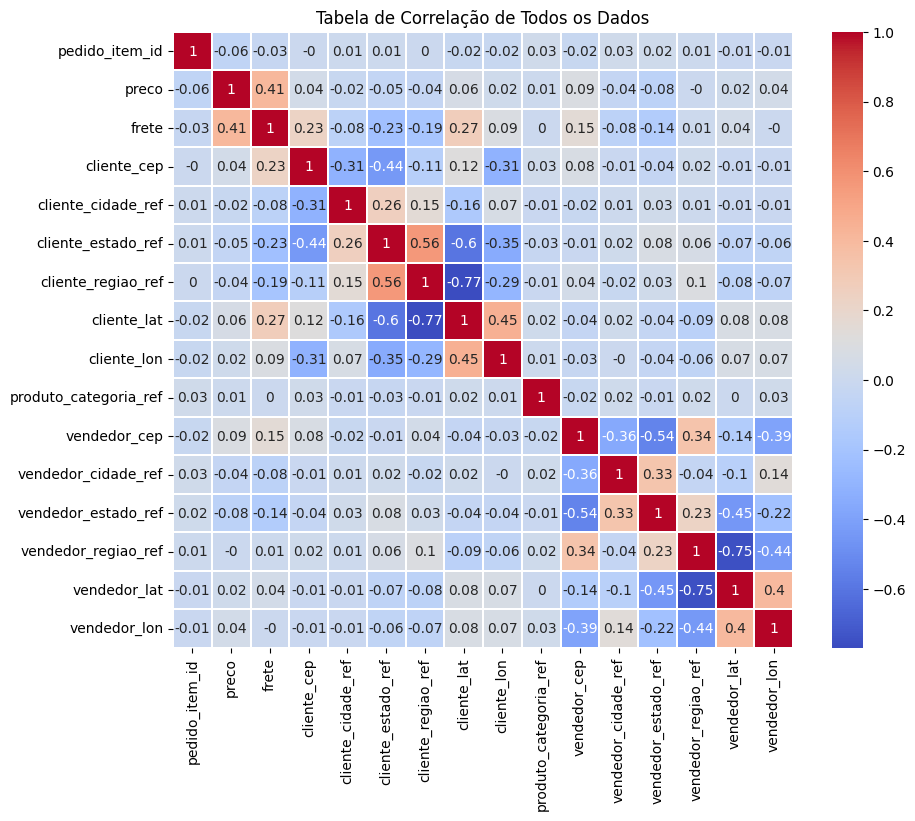

In [118]:
# Selecionar apenas as colunas numéricas
colunas_numericas = relatorio_vendas.select_dtypes(include=['number'])

# Calcular a matriz de correlação
matriz_correlacao = colunas_numericas.corr()
matriz_correlacao = matriz_correlacao.round(2)

# Crie a representação visual da tabela de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Tabela de Correlação de Todos os Dados')
plt.show()

# 3 - Conclusões Iniciais do Conjunto de Dados

- O conjunto de dados é composto por 109.878 lançamentos de vendas, com 46 atributos, sendo 13 qualitativos nominais, 2 qualitativos ordinais, 3 quantitativos contínuos, 2 quantitativos discretos, 8 no formato de datas e 18 Varáveis de identificação ou referência. 

- Foram criados 15 atributos, sendo 6 deles para referência de localização, 8 para referência numérica de dados qualitativos e 1 para referência do produto aproveitando as informações presentes no dataset.

- Há 87656 valores nulos na coluna "avaliação_titulo" e 58248 na "avaliação_comentario", que foram deixados assim, primeiro porque condiz com a realidade ao qual o cliente não quis colocar nenhum comentário, também porque não afetará a análise de sentimentos e não será usado em modelos de machine learning.

# <font color=red>4 - Análises Univariadas</font>

## 4.1 - Clientes

### 4.1.1 - cliente

Resumo estatístico:

In [119]:
relatorio_vendas['cliente'].describe()

count                       109878
unique                       93216
top       porto alegre-RS-c8460e42
freq                            24
Name: cliente, dtype: object

Frequência absoluta:

In [120]:
freq_absoluta = relatorio_vendas['cliente'].value_counts()
freq_absoluta.head(10)

cliente
porto alegre-RS-c8460e42        24
sao paulo-SP-4546caea           21
sao paulo-SP-c402f431           20
goiania-GO-698e1cf8             20
uniao da vitoria-PR-0f5ac8d5    18
sao paulo-SP-8d50f5ea           15
goiania-GO-11f97da0             15
cicero dantas-BA-eae0a83d       15
santos-SP-31e412b9              14
praia grande-SP-3e43e610        14
Name: count, dtype: int64

Gráfico de barras:

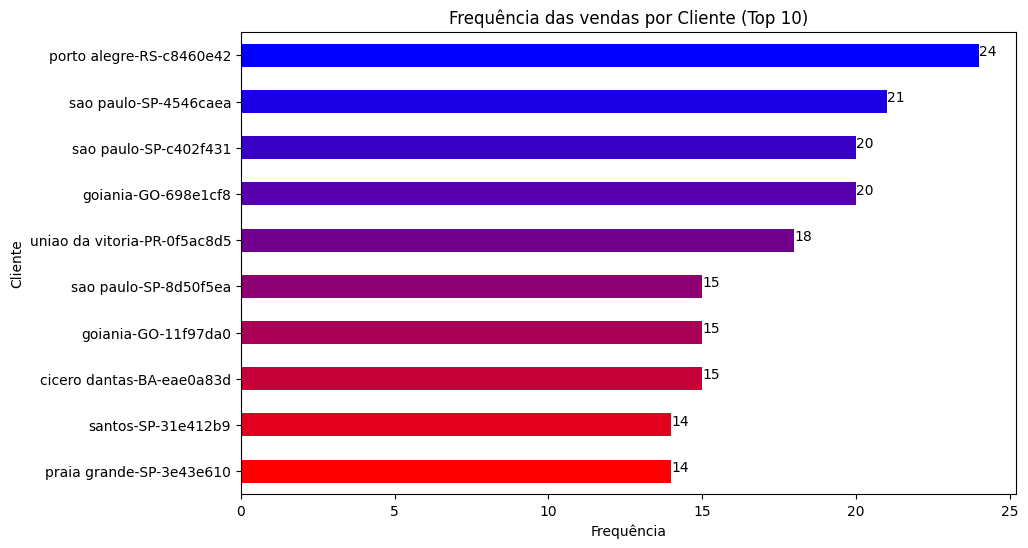

In [121]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das vendas por Cliente (Top 10)')
plt.ylabel('Cliente')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.2 - cliente_cep

Resumo estatístico:

In [122]:
relatorio_vendas['cliente_cep'].describe()

count    109878.000000
mean      35141.972196
std       29897.420345
min        1003.000000
25%       11250.000000
50%       24342.000000
75%       59063.000000
max       99980.000000
Name: cliente_cep, dtype: float64

Frequência absoluta:

In [123]:
freq_absoluta = relatorio_vendas['cliente_cep'].value_counts()
freq_absoluta.head(10)


cliente_cep
22790    147
22793    145
24220    139
24230    133
22775    118
29101    112
35162    109
13087    103
13212    102
22631    101
Name: count, dtype: int64

Gráfico de barras:

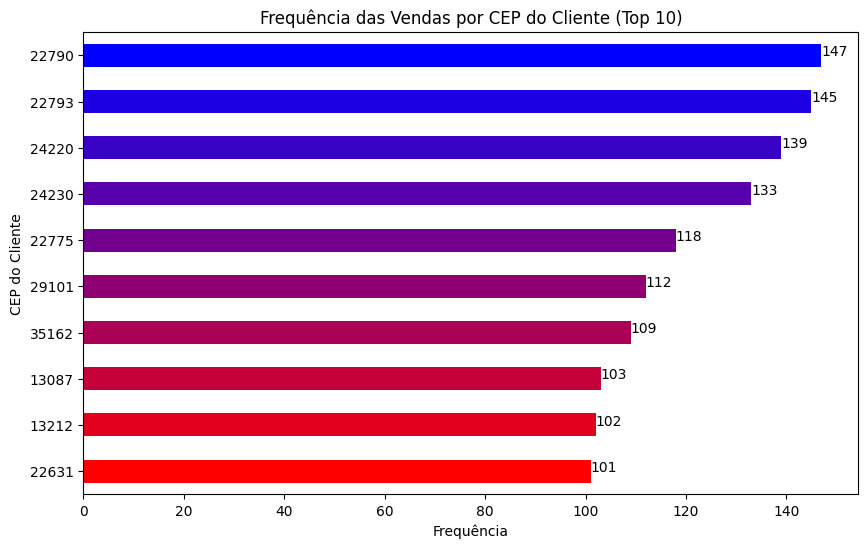

In [124]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por CEP do Cliente (Top 10)')
plt.ylabel('CEP do Cliente')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.3 - cliente_cidade

Resumo estatístico:

In [125]:
relatorio_vendas['cliente_cidade'].describe()

count        109878
unique         4083
top       sao paulo
freq          17364
Name: cliente_cidade, dtype: object

Frequência absoluta e percentual:

In [126]:
freq_absoluta = relatorio_vendas['cliente_cidade'].value_counts()
freq_percentual = relatorio_vendas['cliente_cidade'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='cliente_cidade')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
cliente_cidade,,
sao paulo,17364,16%
rio de janeiro,7559,7%
belo horizonte,3075,3%
brasilia,2333,2%
curitiba,1715,2%
campinas,1616,1%
porto alegre,1571,1%
salvador,1358,1%
guarulhos,1293,1%


Gráfico de barras:

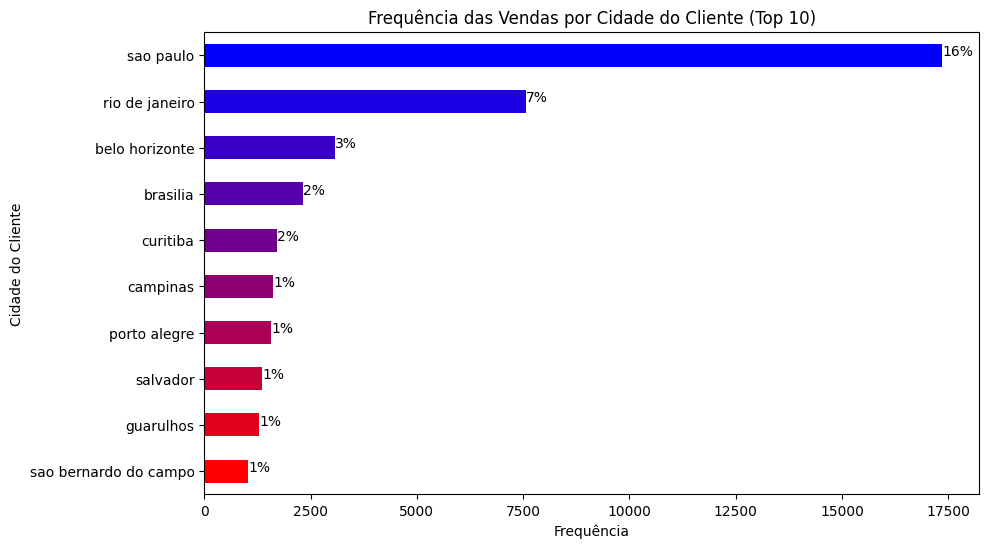

In [127]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Cidade do Cliente (Top 10)')
plt.ylabel('Cidade do Cliente')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.4 - cliente_estado

Resumo estatístico:

In [128]:
relatorio_vendas['cliente_estado'].describe()

count     109878
unique        27
top           SP
freq       46336
Name: cliente_estado, dtype: object

Frequência absoluta e percentual:

In [129]:
freq_absoluta = relatorio_vendas['cliente_estado'].value_counts()
freq_percentual = relatorio_vendas['cliente_estado'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='cliente_estado')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
cliente_estado,,
SP,46336,42%
RJ,14097,13%
MG,12877,12%
RS,6117,6%
PR,5619,5%
SC,4084,4%
BA,3680,3%
DF,2347,2%
GO,2270,2%


Gráfico de barras:

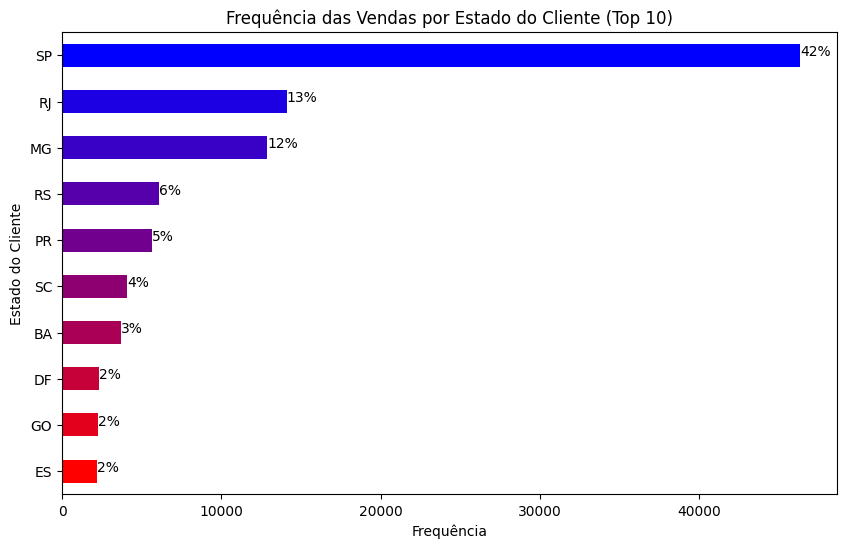

In [130]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Estado do Cliente (Top 10)')
plt.ylabel('Estado do Cliente')
plt.xlabel('Frequência')
for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)
plt.gca().invert_yaxis()
plt.show()

### 4.1.5 - cliente_regiao

Resumo estatístico:

In [131]:
relatorio_vendas['cliente_regiao'].describe()

count      109878
unique          5
top       sudeste
freq        75532
Name: cliente_regiao, dtype: object

Frequência absoluta e percentual:

In [132]:
# Frequência absoluta
freq_absoluta = relatorio_vendas['cliente_regiao'].value_counts()

# Frequência Percentual
freq_percentual = relatorio_vendas['cliente_regiao'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='cliente_regiao')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
cliente_regiao,,
sudeste,75532,69%
sul,15820,14%
nordeste,10052,9%
centro-oeste,6463,6%
norte,2011,2%


Gráfico de barras:

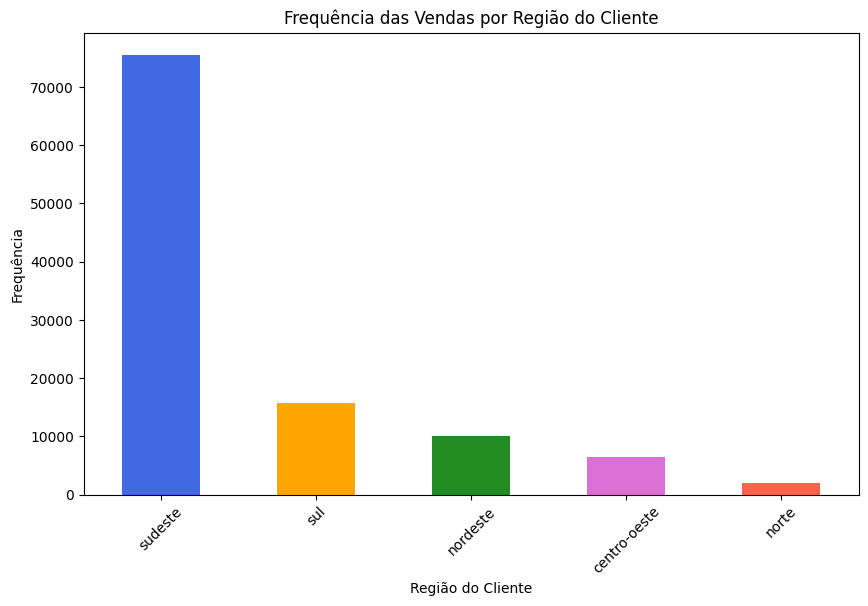

In [133]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'tomato', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal']

plt.figure(figsize=(10, 6))
freq_absoluta.plot(kind='bar', color=cores)
plt.title('Frequência das Vendas por Região do Cliente')
plt.xlabel('Região do Cliente')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

## 4.2 - Vendedores

### 4.2.1 - vendedor

Resumo estatístico:

In [134]:
relatorio_vendas['vendedor'].describe()

count                  109878
unique                   2945
top       sao paulo-SP-656021
freq                     1996
Name: vendedor, dtype: object

Frequência absoluta:

In [135]:
freq_absoluta = relatorio_vendas['vendedor'].value_counts()
freq_absoluta.head(10)

vendedor
sao paulo-SP-656021                1996
ibitinga-SP-4a3ca9                 1949
sao jose do rio preto-SP-1f50f9    1926
santo andre-SP-cc419e              1719
piracicaba-SP-da8622               1548
sao paulo-SP-955fee                1472
sao paulo-SP-1025f0                1420
itaquaquecetuba-SP-7c67e1          1355
sao paulo-SP-ea8482                1188
sao paulo-SP-7a67c8                1155
Name: count, dtype: int64

Gráfico de barras:

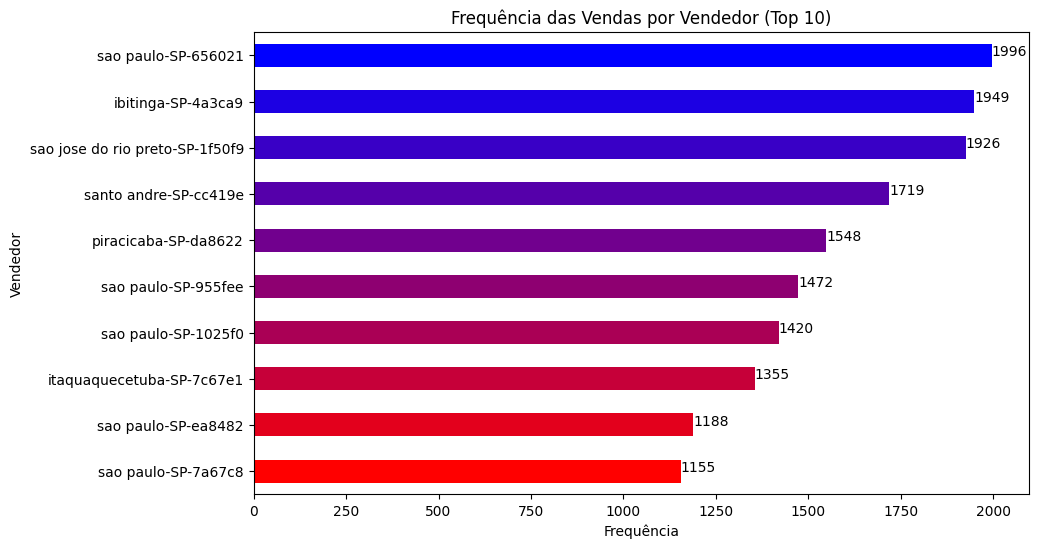

In [136]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Vendedor (Top 10)')
plt.ylabel('Vendedor')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.2.2 - vendedor_cep

Resumo estatístico:

In [137]:
relatorio_vendas['vendedor_cep'].describe()

count    109878.000000
mean      24450.814958
std       27615.783892
min        1001.000000
25%        6429.000000
50%       13566.000000
75%       27930.000000
max       99730.000000
Name: vendedor_cep, dtype: float64

Frequência absoluta:

In [138]:
freq_absoluta = relatorio_vendas['vendedor_cep'].value_counts()
freq_absoluta.head(10)

vendedor_cep
14940    7593
5849     2010
15025    2003
9015     1724
13405    1564
4782     1487
8577     1439
3204     1420
4160     1213
13232    1179
Name: count, dtype: int64

Gráfico de barras:

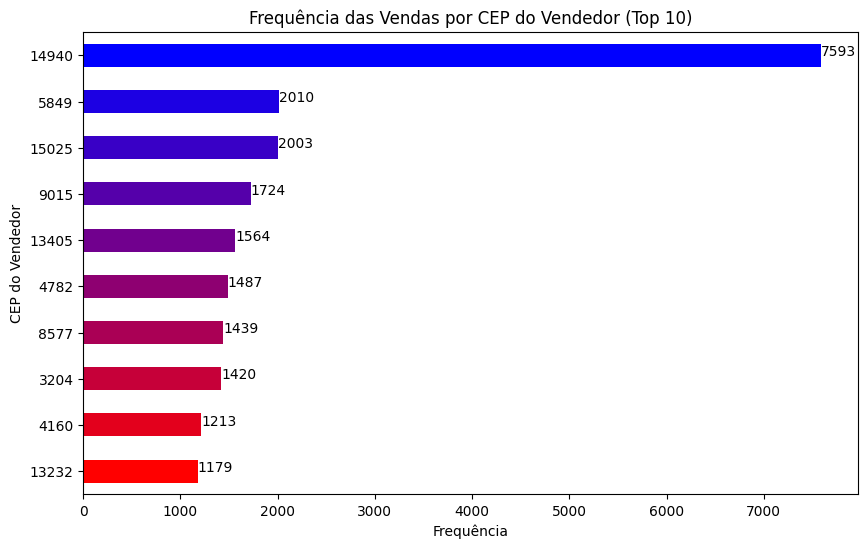

In [139]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por CEP do Vendedor (Top 10)')
plt.ylabel('CEP do Vendedor')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.2.3 - vendedor_cidade

In [140]:
relatorio_vendas['vendedor_cidade'].describe()

count        109878
unique          589
top       sao paulo
freq          27289
Name: vendedor_cidade, dtype: object

Frequência absoluta e percentual:

In [141]:
# Frequência absoluta
freq_absoluta = relatorio_vendas['vendedor_cidade'].value_counts()

# Frequência Percentual
freq_percentual = relatorio_vendas['vendedor_cidade'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='vendedor_cidade')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
vendedor_cidade,,
sao paulo,27289,25%
ibitinga,7593,7%
curitiba,2933,3%
santo andre,2885,3%
sao jose do rio preto,2541,2%
belo horizonte,2514,2%
rio de janeiro,2344,2%
guarulhos,2308,2%
ribeirao preto,2199,2%


Gráfico de barras:

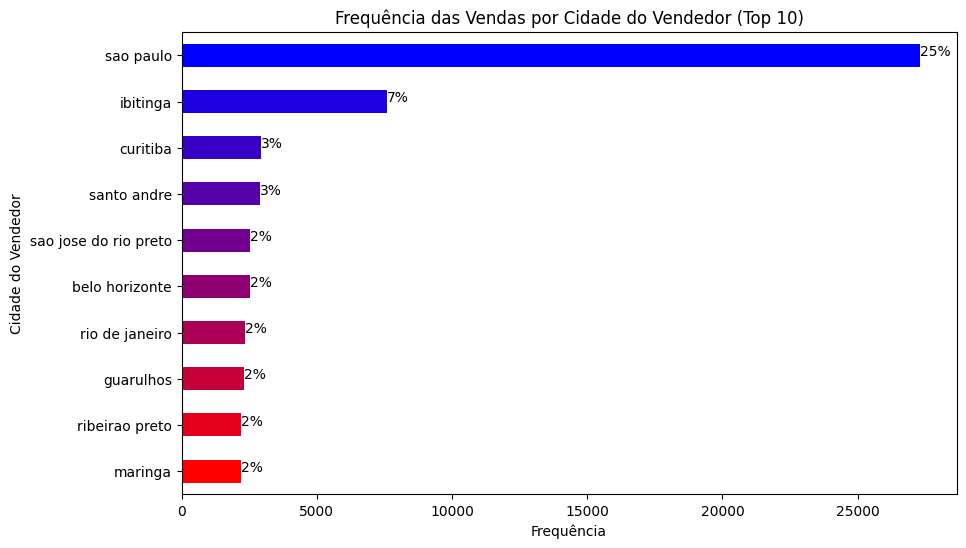

In [142]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Cidade do Vendedor (Top 10)')
plt.ylabel('Cidade do Vendedor')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.2.4 - vendedor_estado

In [143]:
relatorio_vendas['vendedor_estado'].describe()

count     109878
unique        22
top           SP
freq       78419
Name: vendedor_estado, dtype: object

Frequência absoluta e percentual:

In [144]:
# Frequência absoluta
freq_absoluta = relatorio_vendas['vendedor_estado'].value_counts()

# Frequência Percentual
freq_percentual = relatorio_vendas['vendedor_estado'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='vendedor_estado')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']

resultado.head(10)

,Frequência Absoluta,Frequência Percentual
vendedor_estado,,
SP,78419,71%
MG,8577,8%
PR,8445,8%
RJ,4646,4%
SC,3987,4%
RS,2162,2%
DF,881,1%
BA,623,1%
GO,508,0%


Gráfico de barras:

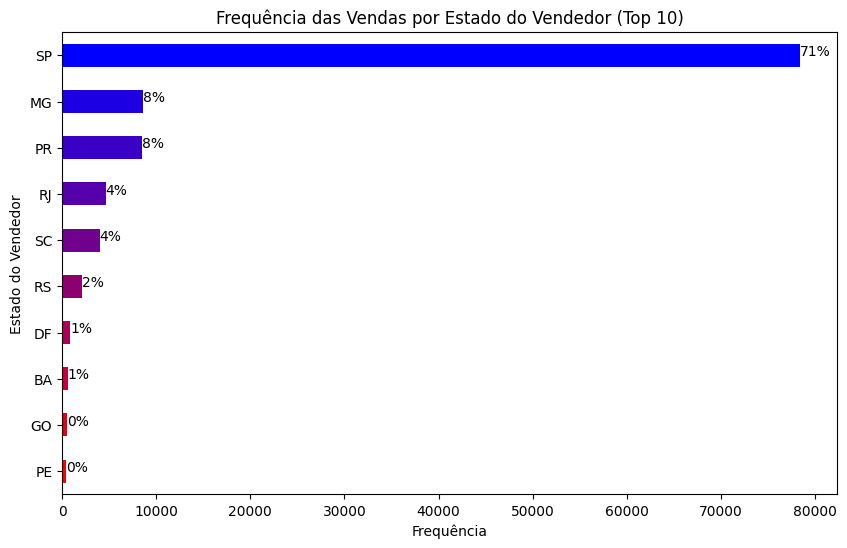

In [145]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Estado do Vendedor (Top 10)')
plt.ylabel('Estado do Vendedor')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.2.5 - vendedor_regiao

Resumo estatístico:

In [146]:
relatorio_vendas['vendedor_regiao'].describe()

count      109878
unique          5
top       sudeste
freq        92005
Name: vendedor_regiao, dtype: object

Frequência absoluta e percentual:

In [147]:
# Frequência absoluta
freq_absoluta = relatorio_vendas['vendedor_regiao'].value_counts()

# Frequência Percentual
freq_percentual = relatorio_vendas['vendedor_regiao'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='vendedor_regiao')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
vendedor_regiao,,
sudeste,92005,84%
sul,14594,13%
nordeste,1674,2%
centro-oeste,1580,1%
norte,25,0%


Gráfico de barras:

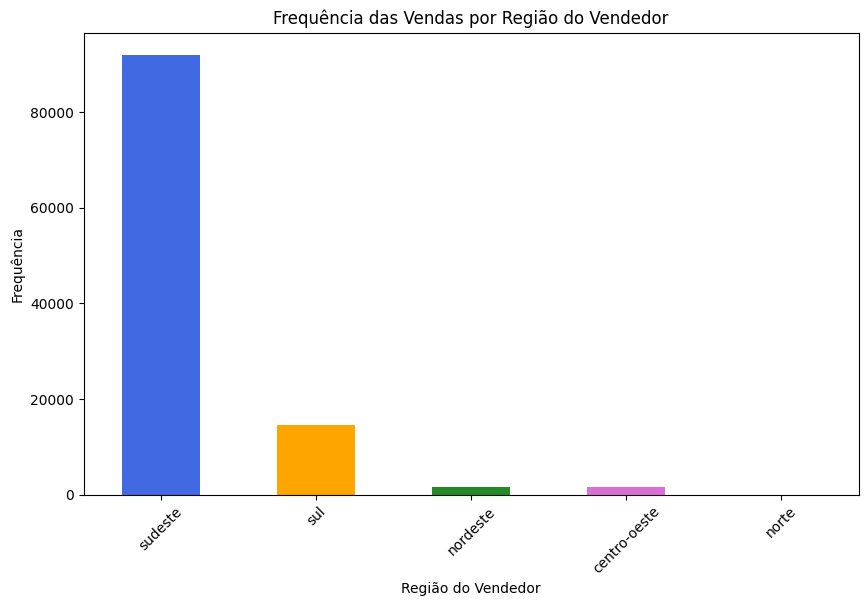

In [148]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'tomato', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal']

plt.figure(figsize=(10, 6))
freq_absoluta.plot(kind='bar', color=cores)
plt.title('Frequência das Vendas por Região do Vendedor')
plt.xlabel('Região do Vendedor')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

## 4.3 - Produtos

### 4.3.1 - produto

Resumo estatístico:

In [149]:
relatorio_vendas['produto'].describe()

count                    109878
unique                    25837
top       moveis_decoracao 3643
freq                        520
Name: produto, dtype: object

Frequência absoluta:

In [150]:
freq_absoluta = relatorio_vendas['produto'].value_counts()
freq_absoluta.head(10)

produto
moveis_decoracao 3643          520
ferramentas_jardim 2038        484
cama_mesa_banho 1783           479
ferramentas_jardim 2251        390
ferramentas_jardim 2157        389
ferramentas_jardim 1982        373
informatica_acessorios 8563    332
relogios_presentes 1183        325
beleza_saude 774               288
informatica_acessorios 1529    272
Name: count, dtype: int64

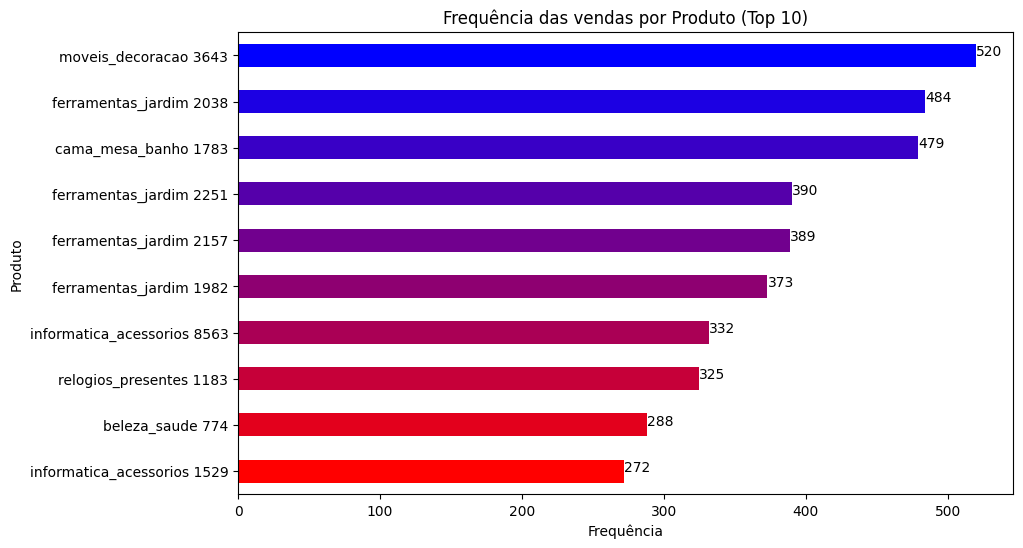

In [151]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das vendas por Produto (Top 10)')
plt.ylabel('Produto')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.3.2 - produto_categoria

Resumo estatístico:

In [152]:
relatorio_vendas['produto_categoria'].describe()

count             109878
unique                25
top       casa_decoracao
freq               22102
Name: produto_categoria, dtype: object

Frequência absoluta e percentual:

In [153]:
# Frequência absoluta
freq_absoluta = relatorio_vendas['produto_categoria'].value_counts()

# Frequência Percentual
freq_percentual = relatorio_vendas['produto_categoria'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='produto_categoria')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
produto_categoria,,
casa_decoracao,22102,20%
beleza_perfumaria,12733,12%
moveis,10666,10%
esporte_lazer,8414,8%
informatica,7914,7%
relogios,5855,5%
telefonia,4672,4%
jardinagem,4296,4%
automotivo,4132,4%


Gráfico de barras:

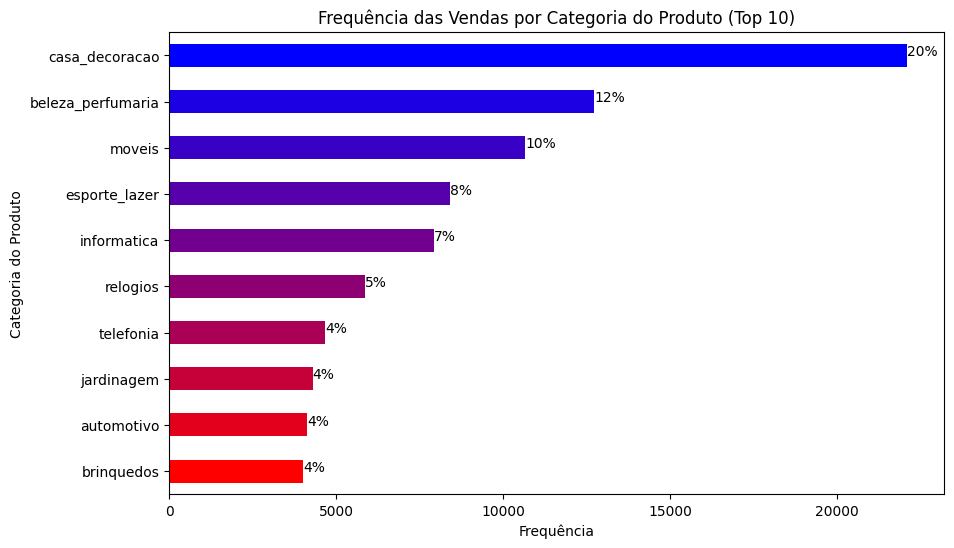

In [154]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Categoria do Produto (Top 10)')
plt.ylabel('Categoria do Produto')
plt.xlabel('Frequência')

# Adicione a frequência percentual em cada barra
for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)


plt.gca().invert_yaxis()
plt.show()

Countplot do Seaborn (Gráfico de Contagem):

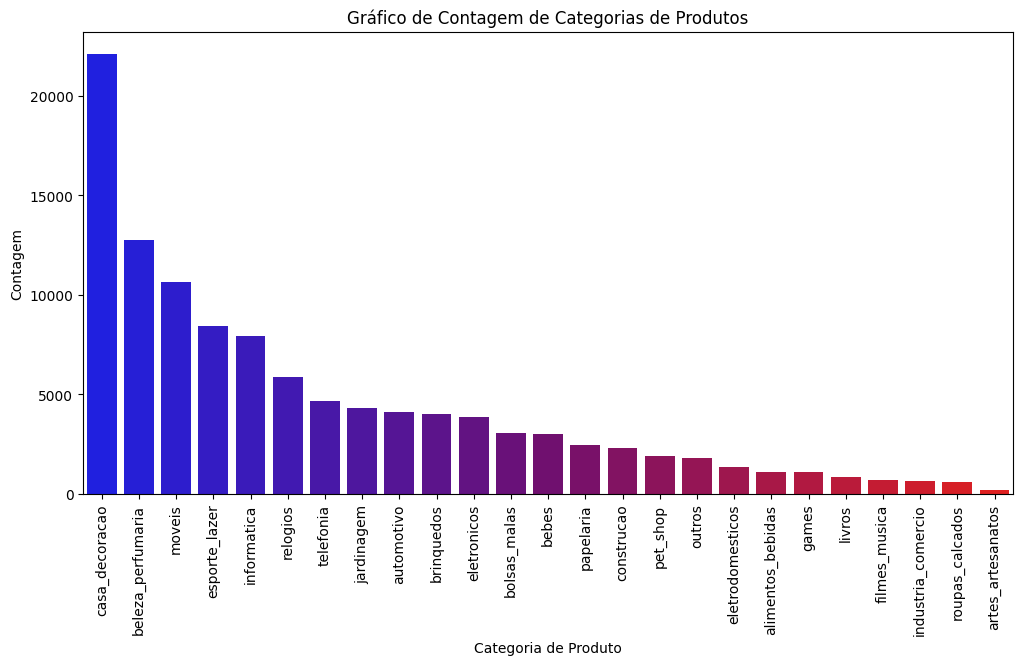

In [155]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list('gradiente_cores', [(0, 0, 1), (1, 0, 0)])
cores = gradiente_cores(np.linspace(0, 1, 25))

plt.figure(figsize=(12, 6)) 
sns.countplot(data=relatorio_vendas, x='produto_categoria', order=relatorio_vendas['produto_categoria'].value_counts().index, palette=cores)
plt.xlabel('Categoria de Produto')
plt.ylabel('Contagem')
plt.title('Gráfico de Contagem de Categorias de Produtos')
plt.xticks(rotation=90)
plt.show()

### 4.3.3 - preco

Resumo estatístico:

In [156]:
summary = relatorio_vendas['preco'].describe()
median = relatorio_vendas['preco'].median()
mode = relatorio_vendas['preco'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      109878.000000
mean          119.958747
std           182.347798
min             0.850000
25%            39.900000
50%            74.900000
75%           134.170000
max          6735.000000
Mediana        74.900000
Moda           59.900000
Name: preco, dtype: float64


Frequência absoluta e percentual:

In [157]:
# Frequência absoluta
freq_absoluta = relatorio_vendas['preco'].value_counts()

# Frequência Percentual
freq_percentual = relatorio_vendas['preco'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='preco')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
preco,,
59.90,2423,2%
69.90,1947,2%
49.90,1910,2%
89.90,1510,1%
99.90,1399,1%
39.90,1299,1%
29.90,1295,1%
19.90,1185,1%
79.90,1177,1%


Histograma:

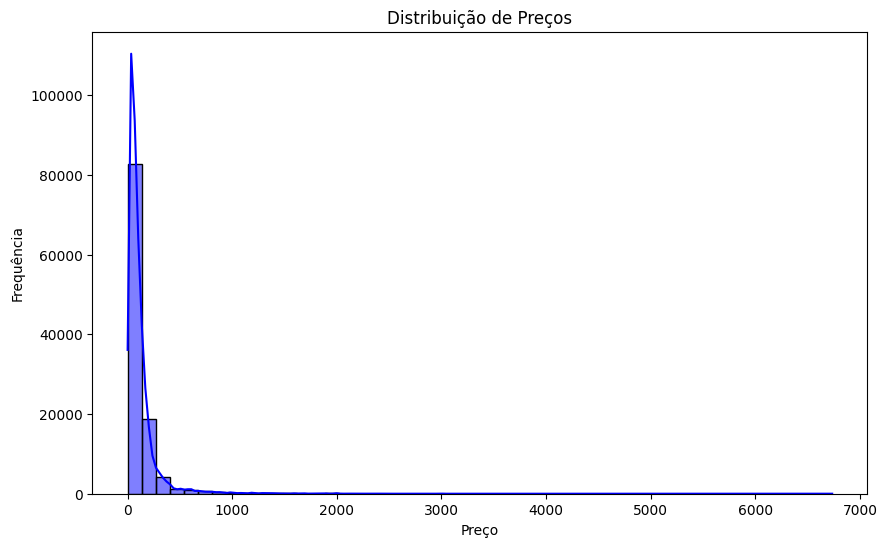

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(relatorio_vendas['preco'], bins=50, kde=True, color='blue')
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

Outliers:

In [159]:
# Quartis
q1 = relatorio_vendas['preco'].quantile(0.25)
q3 = relatorio_vendas['preco'].quantile(0.75)

# Amplitude interquartil (IQR)
iqr = q3 - q1

# Limites superior e inferior para detecção de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Outliers
outliers = relatorio_vendas[(relatorio_vendas['preco'] < limite_inferior) | (relatorio_vendas['preco'] > limite_superior)]

# Número de outliers
num_outliers = len(outliers)

# Porcentagem de outliers em relação ao total de dados
porcentagem_outliers = (num_outliers / len(relatorio_vendas) * 100)

print(f'Número de outliers: {num_outliers}')
print(f'Porcentagem de outliers: {porcentagem_outliers:.2f}%')

Número de outliers: 8130
Porcentagem de outliers: 7.40%


Boxplot para visualizar os outliers:

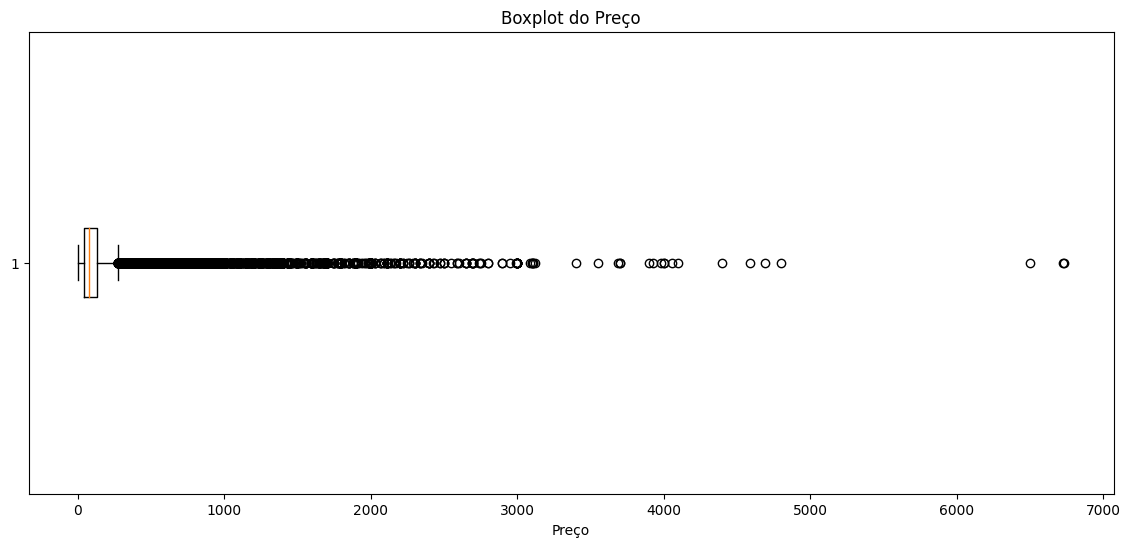

In [160]:
plt.figure(figsize=(14, 6))
plt.boxplot(relatorio_vendas['preco'], vert=False)
plt.title('Boxplot do Preço')
plt.xlabel('Preço')
plt.show()


In [161]:
# Ordenar o DataFrame outliers pela coluna 'preco'
outliers_sorted = outliers[['produto', 'preco', 'frete']].sort_values(by='preco', ascending=False)
outliers_sorted.head(30)

,produto,preco,frete
108150,utilidades_domesticas 31062,6735.00,194.31
8309,pcs 7768,6729.00,193.21
96730,artes 11481,6499.00,227.66
103395,eletroportateis 24558,4799.00,151.34
101557,eletroportateis 32427,4690.00,74.34
15811,pcs 4752,4590.00,91.78
3622,instrumentos_musicais 4683,4399.87,113.45
37267,consoles_games 6348,4099.99,75.27
8282,esporte_lazer 9688,4059.00,104.51
105586,relogios_presentes 2666,3999.90,17.01


**Observação da Análise de Outliers:**

Durante a análise do atributo "preco" com o objetivo de avaliar a presença de possíveis outliers nesse atributo e entender sua natureza, foram obtidas as seguintes informações:

Os resultados da análise revelaram a presença de valores que se destacaram significativamente da distribuição geral de preços dos produtos. Esses valores atípicos, conhecidos como outliers, foram identificados com base na análise do quartil e no critério do intervalo interquartil (IQR).

É importante ressaltar que não é possível afirmar categoricamente se esses outliers representam erros de entrada ou dados verdadeiros. No contexto de um ambiente de comércio eletrônico, a ampla variedade de produtos, preços e promoções pode levar a uma distribuição de preços com valores extremos. Portanto, é plausível que esses valores atípicos sejam legítimos.

Dado esse cenário, não será removevidos os dados originais que contêm outliers. Em vez disso, criamos um novo conjunto de dados denominado "dados_preco_sem_outliers" que exclui os valores identificados como outliers. Essa abordagem nos permite manter a integridade dos dados originais e, ao mesmo tempo, disponibilizar uma versão filtrada para fins de modelagem de machine learning.

A retenção dos dados originais, incluindo os outliers, é crucial, pois a preservação da informação completa é valiosa para análises futuras e uma compreensão mais profunda do comportamento dos preços no comércio eletrônico. Além disso, ao disponibilizar os "dados_preco_sem_outliers", garantimos que os modelos de machine learning possam ser treinados e avaliados com base em diferentes conjuntos de dados, permitindo uma análise comparativa abrangente.

Em resumo, a análise de outliers foi uma etapa importante em nosso projeto, e a abordagem escolhida de preservar os dados originais enquanto fornece uma opção de conjunto de dados filtrado nos permitirá explorar uma ampla gama de cenários e extrair insights valiosos para a organização.

#### 4.4.1 - preco sem outliers

Filtrar os dados excluindo outliers:

In [162]:
dados_preco_sem_outliers = relatorio_vendas[(relatorio_vendas['preco'] >= limite_inferior) & (relatorio_vendas['preco'] <= limite_superior)]

Resumo estatístico (sem outliers):

In [163]:
descricao_sem_outliers = dados_preco_sem_outliers['preco'].describe()
moda_sem_outliers = dados_preco_sem_outliers['preco'].mode()[0]
mediana_sem_outliers = dados_preco_sem_outliers['preco'].median()
print("Estatísticas descritivas do conjunto sem outliers:")
print(descricao_sem_outliers)
print(f'Moda sem outliers: {moda_sem_outliers}')
print(f'Mediana sem outliers: {mediana_sem_outliers}')

Estatísticas descritivas do conjunto sem outliers:
count    101748.000000
mean         83.823812
std          58.375248
min           0.850000
25%          38.500000
50%          69.000000
75%         118.800000
max         275.500000
Name: preco, dtype: float64
Moda sem outliers: 59.9
Mediana sem outliers: 69.0


Freqüência absoluta e percentual (sem outliers):

In [164]:
# Frequência absoluta
freq_absoluta = dados_preco_sem_outliers['preco'].value_counts()

# Frequência Percentual
freq_percentual = dados_preco_sem_outliers['preco'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='preco')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
preco,,
59.90,2423,2%
69.90,1947,2%
49.90,1910,2%
89.90,1510,1%
99.90,1399,1%
39.90,1299,1%
29.90,1295,1%
19.90,1185,1%
79.90,1177,1%


Outliers (sem outliers):

In [165]:
# Quartis
q1_sem_outliers = dados_preco_sem_outliers['preco'].quantile(0.25)
q3_sem_outliers = dados_preco_sem_outliers['preco'].quantile(0.75)

# Amplitude interquartil (IQR)
iqr_sem_outliers = q3_sem_outliers - q1_sem_outliers

# Limites superior e inferior para detecção de outliers
limite_inferior_sem_outliers = q1_sem_outliers - 1.5 * iqr_sem_outliers
limite_superior_sem_outliers = q3_sem_outliers + 1.5 * iqr_sem_outliers

# Outliers
outliers_sem_outliers = dados_preco_sem_outliers[
    (dados_preco_sem_outliers['preco'] < limite_inferior_sem_outliers) |
    (dados_preco_sem_outliers['preco'] > limite_superior_sem_outliers)
]

# Número de outliers
num_outliers_sem_outliers = len(outliers_sem_outliers)

# Porcentagem de outliers em relação ao total de dados
porcentagem_outliers_sem_outliers = (num_outliers_sem_outliers / len(dados_preco_sem_outliers) * 100)

print(f'Número de outliers no conjunto sem outliers: {num_outliers_sem_outliers}')
print(f'Porcentagem de outliers no conjunto sem outliers: {porcentagem_outliers_sem_outliers:.2f}%')


Número de outliers no conjunto sem outliers: 1994
Porcentagem de outliers no conjunto sem outliers: 1.96%


Boxplot para visualizar os outliers (sem outliers):

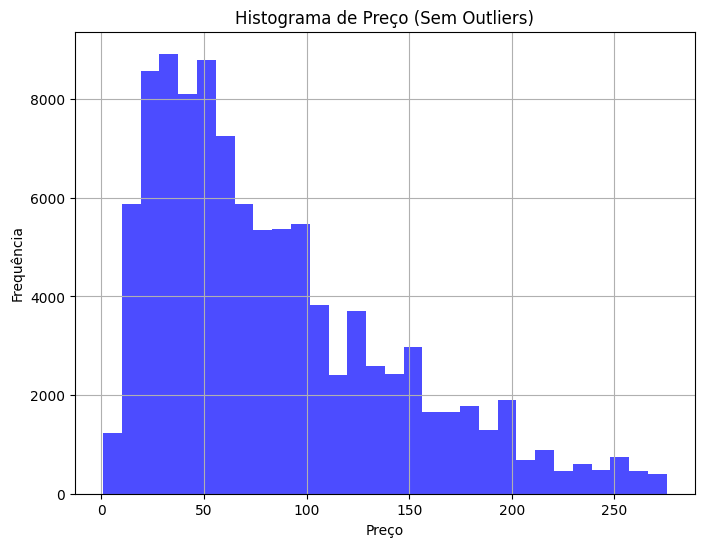

In [166]:
# Plotagem do histograma
plt.figure(figsize=(8, 6))
plt.hist(dados_preco_sem_outliers['preco'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Preço (Sem Outliers)')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


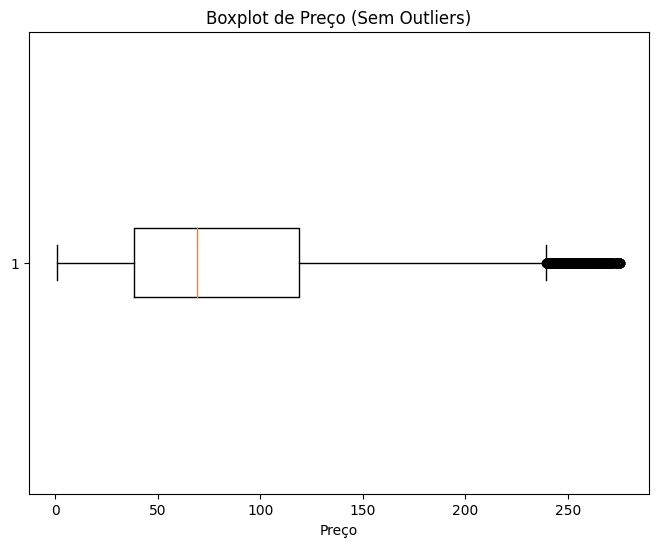

In [167]:
# Plotagem do boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(dados_preco_sem_outliers['preco'], vert=False)
plt.title('Boxplot de Preço (Sem Outliers)')
plt.xlabel('Preço')
plt.show()


/var/folders/37/x6smk6w50577_wrdtdw6yc0m0000gn/T/ipykernel_568/3103747539.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dados_preco_sem_outliers['preco'], shade=True, color='blue')


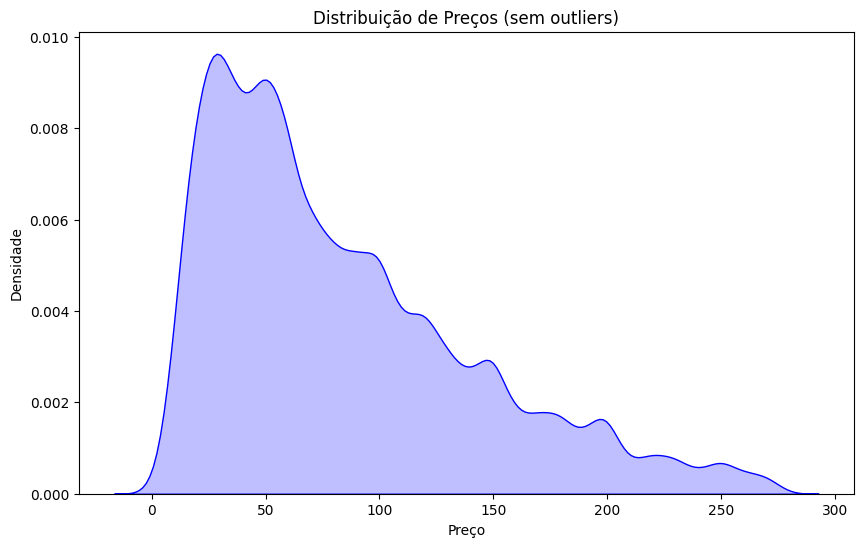

In [168]:
# Crie o gráfico de densidade
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
sns.kdeplot(dados_preco_sem_outliers['preco'], shade=True, color='blue')
plt.title('Distribuição de Preços (sem outliers)')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.show()

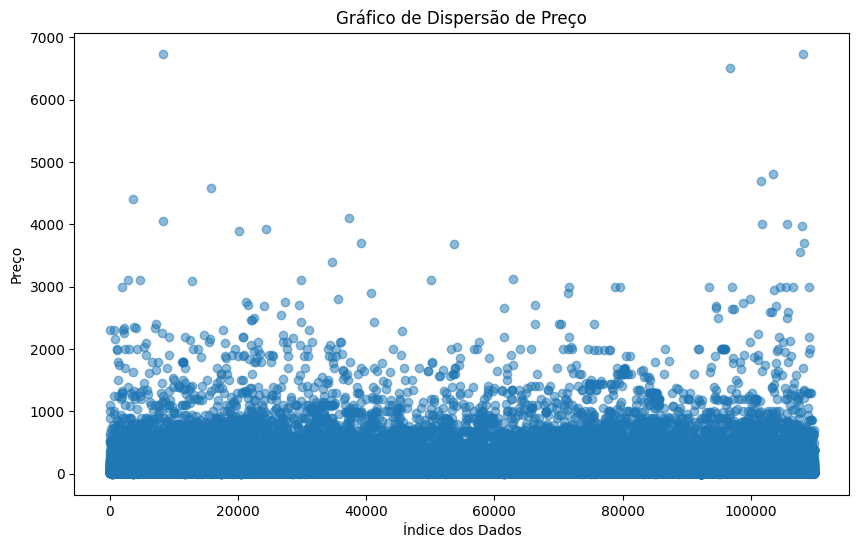

In [169]:
# Crie um gráfico de dispersão com Matplotlib
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.scatter(relatorio_vendas.index, relatorio_vendas['preco'], alpha=0.5)  # Substitua 'dados.index' pelo eixo x apropriado
plt.xlabel('Índice dos Dados')  # Rótulo do eixo x
plt.ylabel('Preço')  # Rótulo do eixo y
plt.title('Gráfico de Dispersão de Preço')  # Título do gráfico
plt.show()

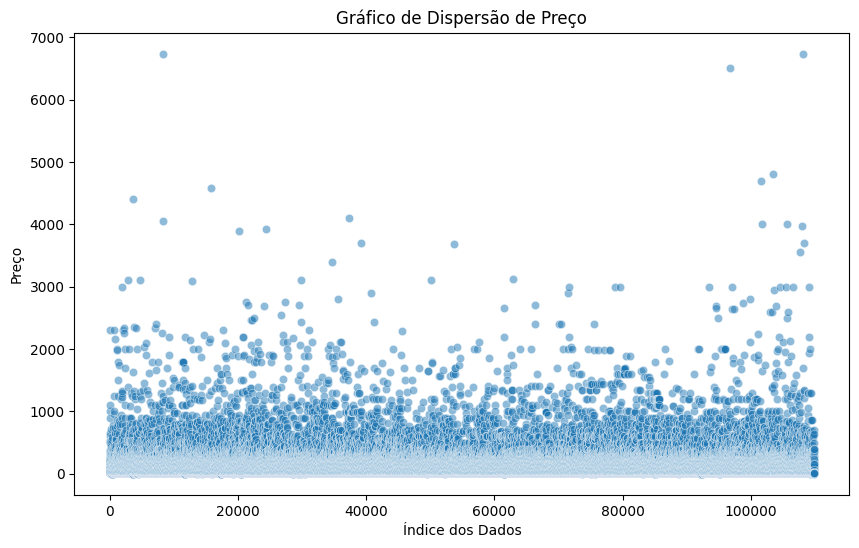

In [170]:
# Crie um gráfico de dispersão com Seaborn
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
sns.scatterplot(data=relatorio_vendas, x=relatorio_vendas.index, y='preco', alpha=0.5)  # Substitua 'dados.index' pelo eixo x apropriado
plt.xlabel('Índice dos Dados')  # Rótulo do eixo x
plt.ylabel('Preço')  # Rótulo do eixo y
plt.title('Gráfico de Dispersão de Preço')  # Título do gráfico
plt.show()

### Conclusão da Análise Univariada da Variável "preco"

Durante a análise univariada da variável "preco" no conjunto de dados do projeto "E-Commerce-KDD", foi realizada uma investigação detalhada para compreender a distribuição dos preços dos produtos. A análise foi conduzida em duas etapas: antes e depois do tratamento de outliers.

**Antes do Tratamento de Outliers**

No conjunto de dados original, observamos o seguinte:

- A média de preço era de aproximadamente R$ 119.78, com um desvio padrão significativo de R$ 181.43, indicando uma variabilidade considerável nos preços.
- O preço mínimo registrado foi de R$ 0.85, enquanto o preço máximo chegou a R$ 6735.00, demonstrando a presença de valores extremos.
- A mediana, que é uma medida de tendência central robusta, ficou em R$ 74.90, enquanto a moda foi de R$ 59.90, sugerindo uma concentração de preços em torno desses valores.
- As frequências absolutas e percentuais indicaram que os preços de R$ 59.90, R$ 69.90 e R$ 49.90 eram os mais comuns, representando 2% cada um.
- Detectamos a presença de 8560 outliers, o que correspondia a aproximadamente 7.45% do conjunto de dados original.

**Após o Tratamento de Outliers**

Após a aplicação do tratamento de outliers, obtivemos o seguinte:

- A média de preço foi ajustada para cerca de R$ 83.52, enquanto o desvio padrão diminuiu para aproximadamente R$ 58.12. Isso indicou uma redução na variabilidade dos preços, tornando-os mais representativos da distribuição central.
- O preço mínimo e máximo foram ajustados para R$ 0.85 e R$ 272.25, respectivamente, após a remoção dos outliers.
- A mediana e a moda não sofreram alterações significativas, permanecendo em R$ 69.00 e R$ 59.90, respectivamente.
- As frequências absolutas e percentuais dos preços mais comuns também permaneceram consistentes após a filtragem de outliers.
- A presença de outliers foi reduzida para 2181, representando cerca de 2.05% do conjunto de dados após o tratamento.

**Justificação para Não Filtrar Mais os Outliers**

A decisão de não realizar uma filtragem adicional dos outliers foi baseada em várias considerações:

1. **Representatividade:** Os outliers podem representar situações legítimas no comércio eletrônico, como produtos de luxo, promoções especiais ou produtos exclusivos. Excluí-los completamente poderia comprometer a representatividade dos dados.

2. **Objetivos do Projeto:** Os outliers podem conter informações valiosas para análises específicas ou modelos de machine learning. Manter a integridade dos dados originais permite uma análise mais abrangente.

3. **Impacto na Análise Preditiva:** A remoção adicional de outliers poderia reduzir a quantidade de dados disponíveis para análises futuras ou modelos de previsão, afetando potencialmente a capacidade do modelo de generalizar.

Portanto, optamos por manter os dados originais, incluindo os outliers, enquanto disponibilizamos uma versão filtrada dos dados para fins de modelagem de machine learning.

### 4.3.4 - frete

Resumo estatístico:

In [171]:
summary = relatorio_vendas['frete'].describe()
median = relatorio_vendas['frete'].median()
mode = relatorio_vendas['frete'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      109878.000000
mean           19.949125
std            15.702740
min             0.000000
25%            13.080000
50%            16.255000
75%            21.150000
max           409.680000
Mediana        16.255000
Moda           15.100000
Name: frete, dtype: float64


Frequência absoluta e percentual:

In [172]:
# Frequência absoluta
freq_absoluta = relatorio_vendas['frete'].value_counts()

# Frequência Percentual
freq_percentual = relatorio_vendas['frete'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='frete')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
frete,,
15.10,3644,3%
7.78,2212,2%
14.10,1824,2%
11.85,1806,2%
18.23,1553,1%
7.39,1496,1%
16.11,1135,1%
15.23,994,1%
8.72,879,1%


Histograma:

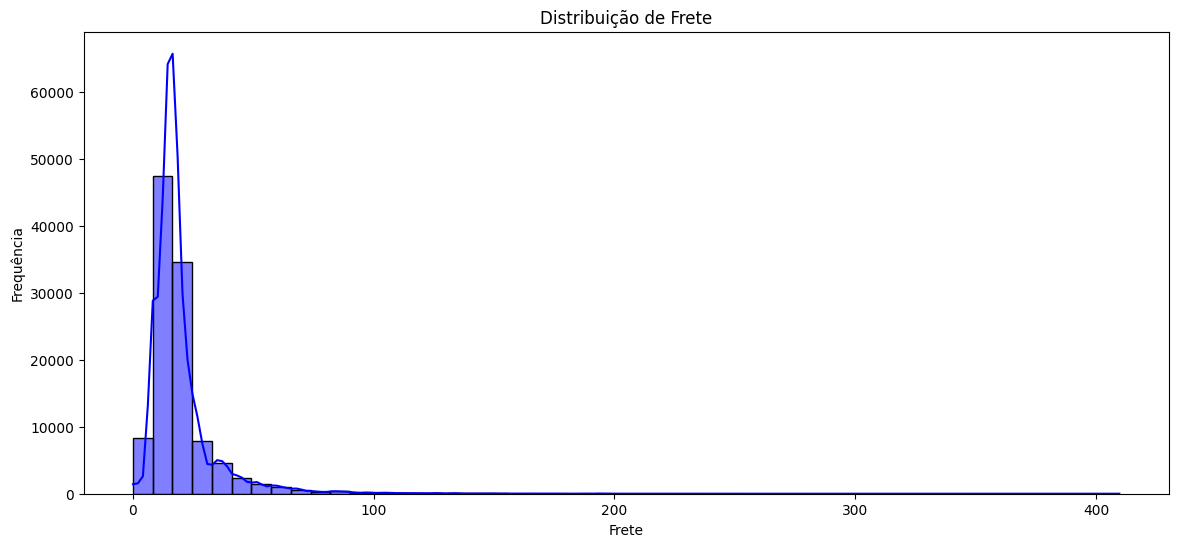

In [173]:
plt.figure(figsize=(14, 6))
sns.histplot(relatorio_vendas['frete'], bins=50, kde=True, color='blue')
plt.title('Distribuição de Frete')
plt.xlabel('Frete')
plt.ylabel('Frequência')
plt.show()

Outliers:

In [174]:
# Quartis
q1 = relatorio_vendas['frete'].quantile(0.25)
q3 = relatorio_vendas['frete'].quantile(0.75)

# Amplitude interquartil (IQR)
iqr = q3 - q1

# Limites superior e inferior para detecção de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Outliers
outliers = relatorio_vendas[(relatorio_vendas['frete'] < limite_inferior) | (relatorio_vendas['frete'] > limite_superior)]

# Número de outliers
num_outliers = len(outliers)

# Porcentagem de outliers em relação ao total de dados
porcentagem_outliers = (num_outliers / len(relatorio_vendas) * 100)

print(f'Número de outliers: {num_outliers}')
print(f'Porcentagem de outliers: {porcentagem_outliers:.2f}%')


Número de outliers: 11791
Porcentagem de outliers: 10.73%


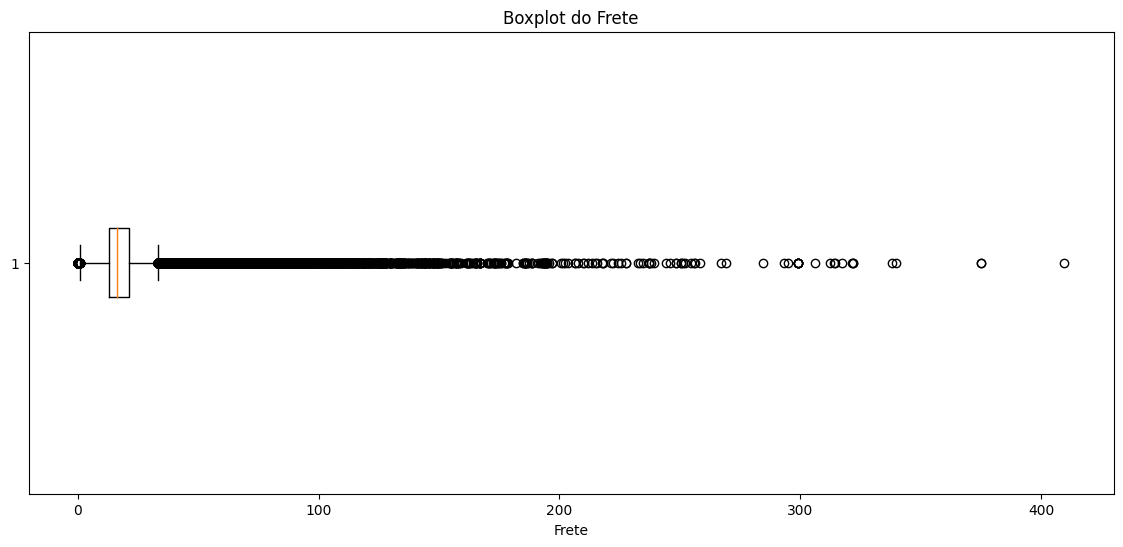

In [175]:
# Boxplot para visualizar os outliers
plt.figure(figsize=(14, 6))
plt.boxplot(relatorio_vendas['frete'], vert=False)
plt.title('Boxplot do Frete')
plt.xlabel('Frete')
plt.show()

**Conclusões da análise da variável "Frete":**

Nesta etapa da análise descritiva univariada, examinamos o atributo "frete" do conjunto de dados. O frete desempenha um papel crucial no contexto do comércio eletrônico, pois pode afetar diretamente a satisfação do cliente e a rentabilidade da empresa. Portanto, entender a distribuição desse atributo é fundamental para a tomada de decisões informadas.

- **Média (Mean):** A média do valor do frete é de aproximadamente R$ 19,97. Isso fornece uma ideia geral do custo médio de entrega de produtos.
- **Desvio Padrão (Std):** O desvio padrão de aproximadamente R$ 15,70 indica que os valores do frete tendem a se espalhar em relação à média.
- **Mínimo (Min):** O valor mínimo do frete é de R$ 0,00, o que pode ser um indicativo de promoções especiais de frete grátis ou erros no registro de dados.
- **75º Percentil (75%):** 75% dos valores de frete são iguais ou inferiores a R$ 21,15. Isso representa o terceiro quartil da distribuição.
- **Máximo (Max):** O valor máximo do frete observado é de R$ 409,68, que é significativamente maior que o terceiro quartil. Isso indica a presença de valores extremos na distribuição.
-  A análise da distribuição de frete é fundamental para compreender os custos associados às operações e pode ser útil na formulação de estratégias de precificação, otimização de custos e satisfação do cliente.

É importante ressaltar que não serão tratados os outliers da variável "frete", pois com o tratamento dos outliers da variável "preco", pode ser usado o mesmo filtro "dados_preco_sem_outliers" para futuros modelos de machine learning.

## 4.4 - Pagamentos

### 4.4.1 - pagamento_forma

**Observação:**
A forma de pagamento é referente ao pagamento por produto, ou seja, se o cliente comprou 3 produtos em somente um pedido e pagou em boleto, agregará 3 ocorrências na frequência absoluta do pagamento em boleto.

Resumo estatístico:

In [176]:
pagamentos['pagamento_forma'].describe()

count          103877
unique              4
top       credit_card
freq            76795
Name: pagamento_forma, dtype: object

Frequência absoluta e percentual:

In [177]:
# Frequência absoluta
freq_absoluta = pagamentos['pagamento_forma'].value_counts()

# Frequência Percentual
freq_percentual = pagamentos['pagamento_forma'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='pagamento_forma')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
pagamento_forma,,
credit_card,76795,74%
boleto,19784,19%
voucher,5769,6%
debit_card,1529,1%


Gráfico de barras:

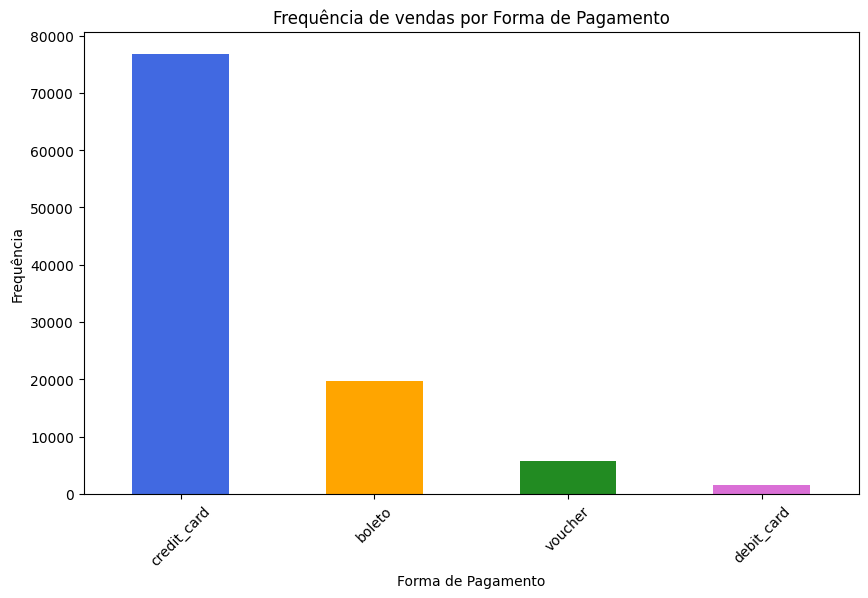

In [178]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

plt.figure(figsize=(10, 6))
freq_absoluta.plot(kind='bar', color=cores)
plt.title('Frequência de vendas por Forma de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### 4.4.2 - pagamento_parcelas

**Observação:**
O número de parcelas é referente ao pagamento por produto, ou seja, se o cliente comprou 3 produtos em somente um pedido e pagou em 4 parcelas, agregará 3 ocorrências na frequência absoluta do pagamento em 4 parcelas.

Resumo estatístico:

In [179]:
summary = pagamentos['pagamento_parcelas'].describe()
median = pagamentos['pagamento_parcelas'].median()
mode = pagamentos['pagamento_parcelas'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      103877.000000
mean            2.853509
std             2.687112
min             0.000000
25%             1.000000
50%             1.000000
75%             4.000000
max            24.000000
Mediana         1.000000
Moda            1.000000
Name: pagamento_parcelas, dtype: float64


Frequência absoluta e percentual:

In [180]:
# Frequência absoluta
freq_absoluta = pagamentos['pagamento_parcelas'].value_counts()

# Frequência Percentual
freq_percentual = pagamentos['pagamento_parcelas'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='pagamento_parcelas')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(30)

,Frequência Absoluta,Frequência Percentual
pagamento_parcelas,,
1,52537,51%
2,12413,12%
3,10461,10%
4,7098,7%
10,5328,5%
5,5239,5%
8,4268,4%
6,3920,4%
7,1626,2%


Grafico de barras:

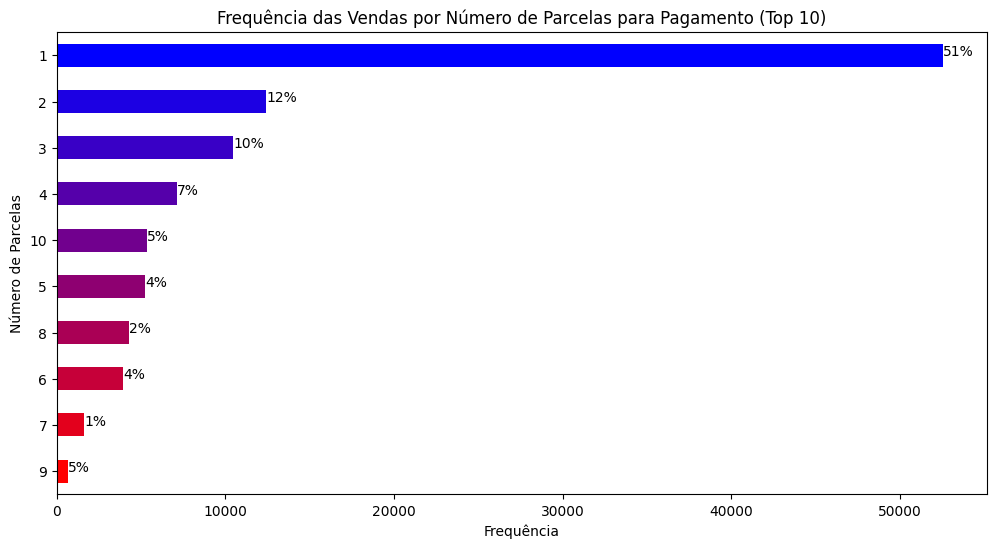

In [181]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(12, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Número de Parcelas para Pagamento (Top 10)')
plt.ylabel('Número de Parcelas')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index+1]), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

Histograma:

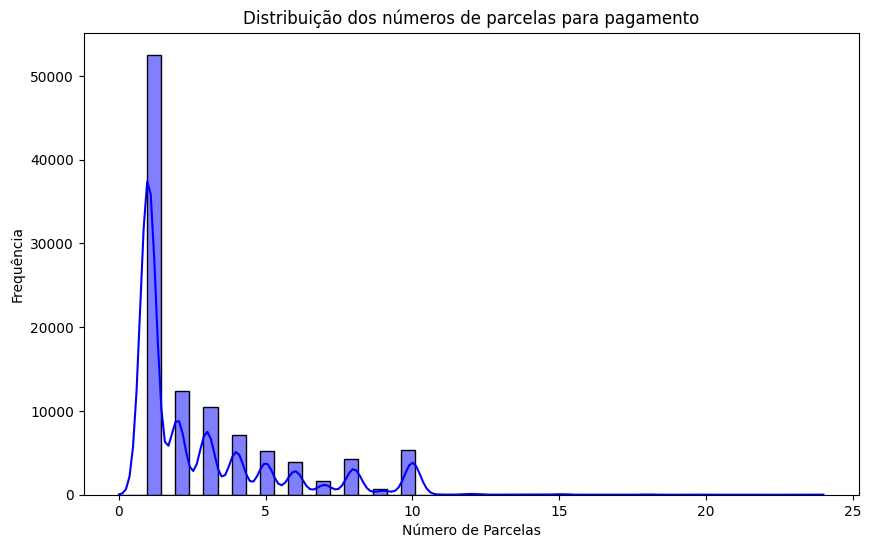

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(pagamentos['pagamento_parcelas'], bins=50, kde=True, color='blue')
plt.title('Distribuição dos números de parcelas para pagamento')
plt.xlabel('Número de Parcelas')
plt.ylabel('Frequência')
plt.show()

**Conclusão da Variável "pagamento_parcelas":**

Ao analisar a variável "pagamento_parcelas", que representa o número de parcelas escolhidas pelos clientes para pagamento de seus pedidos, foram obtidas diversas informações relevantes.

   - A distribuição de parcelamentos varia de 1 a 24 vezes, com a metade dos pedidos sendo pagos a vista (50% dos casos).
   - Parcelamentos de 2 vezes (12%) e 3 vezes (10%) também são relativamente comuns.
   - Parcelamentos em quantidades até 10 vezes representam uma porcentagem significativa dos pedidos, demonstrando uma diversidade nas escolhas dos clientes.
   - Parcelamentos em quantidades maiores que 10 vezes são menos comuns, representando menos de 1% dos pedidos.

Em resumo, a análise da variável "pagamento_parcelas" indica que a maioria dos clientes opta por pagar seus pedidos a vista, seguido por parcelamentos em 2 ou 3 vezes. Isso sugere que a conveniência do pagamento integral é valorizada pelos clientes, mas ainda há uma demanda considerável por opções de parcelamento em pequenas quantidades.

Essas informações podem ser úteis para estratégias de precificação, promoções e opções de pagamento oferecidas pela empresa, visando atender às preferências e necessidades dos clientes.

### 4.4.3 - pagamento_valor

Resumo estatístico:

In [183]:
summary = pagamentos['pagamento_valor'].describe()
median = pagamentos['pagamento_valor'].median()
mode = pagamentos['pagamento_valor'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      103877.000000
mean          154.113732
std           217.498755
min             0.010000
25%            56.820000
50%           100.000000
75%           171.840000
max         13664.080000
Mediana       100.000000
Moda           50.000000
Name: pagamento_valor, dtype: float64


Frequência absoluta e percentual:

In [184]:
# Frequência absoluta
freq_absoluta = pagamentos['pagamento_valor'].value_counts()

# Frequência Percentual
freq_percentual = pagamentos['pagamento_valor'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='pagamento_valor')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
pagamento_valor,,
50.00,324,0%
20.00,274,0%
100.00,255,0%
77.57,250,0%
35.00,165,0%
73.34,160,0%
30.00,133,0%
116.94,131,0%
56.78,122,0%


Histograma:

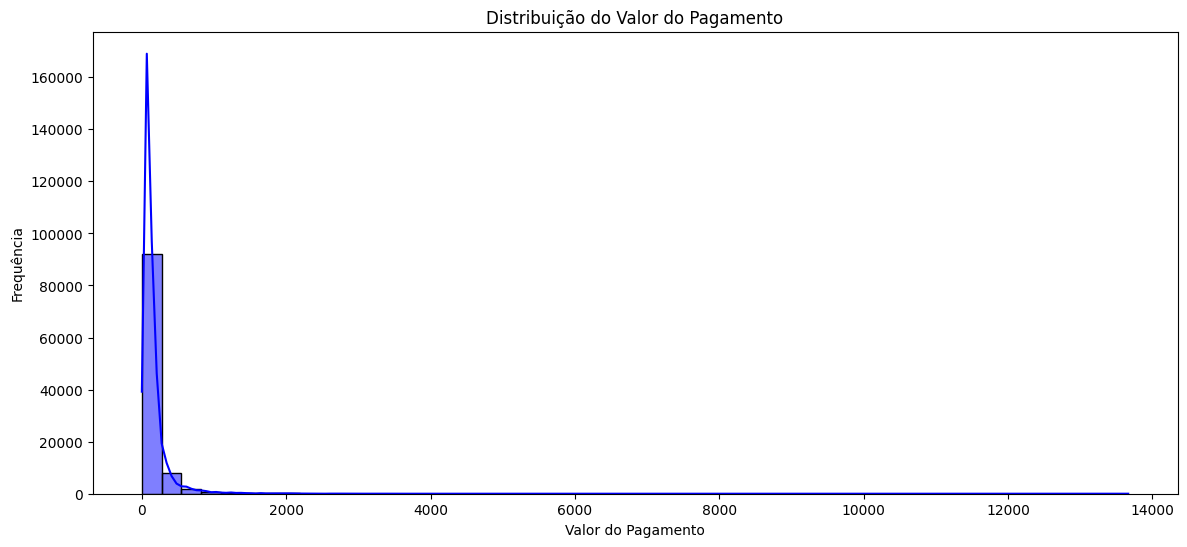

In [185]:
plt.figure(figsize=(14, 6))
sns.histplot(pagamentos['pagamento_valor'], bins=50, kde=True, color='blue')
plt.title('Distribuição do Valor do Pagamento')
plt.xlabel('Valor do Pagamento')
plt.ylabel('Frequência')
plt.show()

Outliers:

In [186]:
# Quartis
q1 = pagamentos['pagamento_valor'].quantile(0.25)
q3 = pagamentos['pagamento_valor'].quantile(0.75)

# Amplitude interquartil (IQR)
iqr = q3 - q1

# Limites superior e inferior para detecção de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Outliers
outliers = pagamentos[(pagamentos['pagamento_valor'] < limite_inferior) | (pagamentos['pagamento_valor'] > limite_superior)]

# Número de outliers
num_outliers = len(outliers)

# Porcentagem de outliers em relação ao total de dados
porcentagem_outliers = (num_outliers / len(pagamentos) * 100)

print(f'Número de outliers: {num_outliers}')
print(f'Porcentagem de outliers: {porcentagem_outliers:.2f}%')

Número de outliers: 7981
Porcentagem de outliers: 7.68%


### Conclusão da Análise do Atributo "pagamento_valor"

Nesta etapa, exploramos o atributo "pagamento_valor" para conhecimento da variável para uma análise com outras variáveis. 

- **Distribuição:** A distribuição de pagamentos é positivamente assimétrica, com uma cauda à direita, o que significa que a maioria dos pagamentos concentra-se em valores menores, mas existem alguns valores muito elevados, como evidenciado pelos outliers.

- **Análise de Outliers:** É importante observar que identificamos a presença de outliers na variável "pagamento_valor". O número de outliers é de 7.981, o que representa aproximadamente 7,68% do conjunto de dados, como já foi criado um filtro de outliers na variável preço e esta variavel que será usada como referencia de valor nas proximas fases, a variavel "pagamento_valor" será usada somente para a análise de pagamentos usando o conjunto de dados **pagamentos** inteiro.

- **Conclusão:** A análise univariada do atributo "pagamento_valor" forneceu uma visão geral das características dos valores de pagamento no conjunto de dados.  A distribuição de pagamentos é positivamente assimétrica, com uma cauda à direita, média de R$ 154,11, mediana de  R$ 100,00, 75% dos pagamentos sendo inferiores a R$ 172,00, enquanto o valor máximo é de R$ 13664,08, indicam que a grande concentração dos pagamentos é de valores pequenos tendo alguns produtos com valores bem elevados.


## 4.5 - Avaliações

### 4.5.1 - avaliacao_titulo

Resumo estatístico:

In [187]:
avaliacoes['avaliacao_titulo'].describe()

count          99224
unique          4010
top       sem título
freq           87656
Name: avaliacao_titulo, dtype: object

Frequência absoluta e percentual:

In [198]:
# Frequência absoluta
freq_absoluta = avaliacoes['avaliacao_titulo'].value_counts()

# Frequência Percentual
freq_percentual = avaliacoes['avaliacao_titulo'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='avaliacao_titulo')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head()

,Frequência Absoluta,Frequência Percentual
avaliacao_titulo,,
sem título,87656,88%
recomendo,825,1%
super recomendo,578,1%
bom,406,0%
muito bom,333,0%


# Conclusão da análise dos Títulos, Comentários e Notas das Avaliações:

-  temos um total de 99.224 lançamentos que receberam nota de avaliação.
- Apenas 11.568 possui um título específico, equivalendo 12% dos lançamentos.
- Aproximadamente 41% dos clientes deixaram um comentário de sua experiência.

Por isso será dado maior ênfase nas análises dos comentários já que os títulos é apenas um resumo do sentimento descrito nos comentários do cliente. No entanto, entre os títulos e comentários que foram fornecidos, destacam-se termos como "recomendo", "bom", "muito bom" e "ótimo", sugerindo uma tendência geral de experiências positivas. A presença significativa desses termos indica que a maioria dos clientes está satisfeita com os produtos ou serviços.
É possível notar que os clientes que deram nota máxima e a nota mínima tem uma tendência a deixar um comentário, enquanto os clientes que deram notas intermediárias, muitos não deixaram. Isso pode ser um indicativo de que os clientes que estão muito satisfeitos ou muito insatisfeitos tendem a deixar um comentário.

**Prescrição de melhorias:**

Esses insights podem orientar a empresa na compreensão da satisfação do cliente como:
-  A alta frequência de avaliações sem título sugere que simplificar o processo de avaliação pode incentivar mais clientes a fornecer feedback detalhado. 
- Além disso, as palavras positivas mais frequentes, como "recomendo", podem ser usadas como pontos de destaque nas estratégias de marketing, criando um sentimento de identificação em quem conhece o serviço e construindo confiança com potenciais novos clientes. 
- Por outro lado, as avaliações com termos negativos, como "Não recebi o produto", devem ser investigadas para identificar áreas de melhoria. 
- É aconselhável ter uma investigação bem aprofundada sobre os motivos que levaram a essas avaliações negativas, principalmente aos que deram nota 1 pois como percebido nas análises, os clientes insatisfeitos tendem a dividir suas experiências negativas com maior frequência dos que ficaram satisfeitos com o serviço, o que pode afetar negativamente a reputação da empresa.

## **Conclusão da Análise das Notas de Avaliação**

A análise das notas de avaliação revela insights interessantes sobre a satisfação dos clientes. A maioria das avaliações, aproximadamente 77%, possui notas entre 4 e 5, sugerindo uma tendência geralmente positiva. A mediana e a moda das avaliações são 5, indicando que a maioria dos clientes atribuiu a nota máxima.

No entanto, também é notável que uma parcela significativa, cerca de 20%, atribuiu notas entre 1 e 3, indicando insatisfação em alguns casos. É importante monitorar e abordar as avaliações com notas mais baixas, pois elas representam uma oportunidade de melhoria.

A variabilidade das notas, com um desvio padrão de 1,35, mostra que as avaliações variam consideravelmente, o que pode refletir diferentes experiências dos clientes.

Em resumo, a maioria dos clientes parece satisfeita, mas há espaço para melhorias em algumas áreas para aumentar a satisfação geral, destacando-se a importância contínua de manter padrões elevados de atendimento ao cliente e de abordar as preocupações dos clientes insatisfeitos A análise das avaliações é fundamental para entender as necessidades dos clientes e aprimorar a qualidade dos produtos e serviços oferecidos.

Filtrar somente os lançamentos que receberam o título de avaliação para melhor análise:

In [189]:
avaliacoes_com_titulo = avaliacoes[avaliacoes['avaliacao_titulo'] != 'sem título']

In [190]:
avaliacoes_com_titulo['avaliacao_titulo'].info()

<class 'pandas.core.series.Series'>
Index: 11568 entries, 9 to 99200
Series name: avaliacao_titulo
Non-Null Count  Dtype 
--------------  ----- 
11568 non-null  object
dtypes: object(1)
memory usage: 180.8+ KB


Freqüência absoluta e percentual das avaliações com título:

In [197]:
# Frequência absoluta
freq_absoluta = avaliacoes_com_titulo['avaliacao_titulo'].value_counts()

# Frequência Percentual
freq_percentual = avaliacoes_com_titulo['avaliacao_titulo'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='avaliacao_titulo')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
avaliacao_titulo,,
recomendo,825,7%
super recomendo,578,5%
bom,406,4%
muito bom,333,3%
excelente,304,3%
otimo,290,3%
ótimo,278,2%
ótimo,219,2%
10,158,1%


### 4.5.2 - avaliacao_comentario

Resumo estatístico:

In [192]:
avaliacoes['avaliacao_comentario'].describe()

count              99223
unique             35565
top       sem comentario
freq               58249
Name: avaliacao_comentario, dtype: object

Frequência absoluta e percentual:

In [193]:
# Frequência absoluta
freq_absoluta = avaliacoes['avaliacao_comentario'].value_counts()

# Frequência Percentual
freq_percentual = avaliacoes['avaliacao_comentario'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='avaliacao_comentario')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(20)

,Frequência Absoluta,Frequência Percentual
avaliacao_comentario,,
sem comentario,58249,59%
muito bom,369,0%
bom,309,0%
otimo,207,0%
recomendo,175,0%
ok,139,0%
excelente,112,0%
ótimo,110,0%
tudo ok,85,0%


### 4.5.3 - avaliacao_nota

Resumo estatístico:

In [194]:
avaliacoes['avaliacao_nota'].describe()
summary = avaliacoes['avaliacao_nota'].describe()
median = avaliacoes['avaliacao_nota'].median()
mode = avaliacoes['avaliacao_nota'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      99224.000000
mean           4.086421
std            1.347579
min            1.000000
25%            4.000000
50%            5.000000
75%            5.000000
max            5.000000
Mediana        5.000000
Moda           5.000000
Name: avaliacao_nota, dtype: float64


Frequência absoluta e percentual:

In [195]:
# Frequência absoluta
freq_absoluta = avaliacoes['avaliacao_nota'].value_counts()

# Frequência Percentual
freq_percentual = avaliacoes['avaliacao_nota'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='avaliacao_nota')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head()

,Frequência Absoluta,Frequência Percentual
avaliacao_nota,,
5,57328,58%
4,19142,19%
1,11424,12%
3,8179,8%
2,3151,3%


Gráfico de barras:

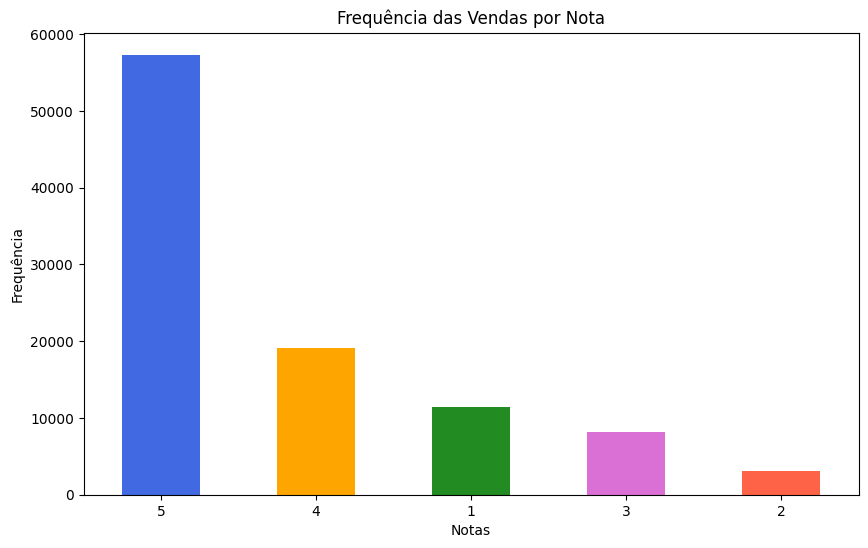

In [196]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'tomato', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal']

plt.figure(figsize=(10, 6))
freq_absoluta.plot(kind='bar', color=cores)
plt.title('Frequência das Vendas por Nota')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

## 4.6 - Variáveis Temporais

- 4.6.1 - data_limite_envio
- 4.6.2 - data_compra
- 4.6.3 - data_aprovacao_pedido
- 4.6.4 - data_entrega_transportadora
- 4.6.5 - data_entrega_cliente
- 4.6.6 - data_estimada_entrega
- 4.6.7 - avaliacao_data
- 4.6.8 - avaliacao_data_resposta


As variáveis temporais serão analisadas em conjunto com as outras variáveis na fase seguinte da análise exploratória.